Importing initially important libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

Defining features names

In [3]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

Importing train and validation data

In [9]:
df_train = pd.read_csv("/content/train_FD001.txt",sep=' ',header=None,index_col=False,names=col_names)
df_valid = pd.read_csv("/content/test_FD001.txt",sep=' ',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv("/content/RUL_FD001.txt",sep=' ',header=None,index_col=False,names=['RUL'])

In [10]:
df_train.head()

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [11]:
df_valid.head()

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1     0.0023     0.0003      100.0  518.67  643.02   
1            1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2            1            3     0.0003     0.0001      100.0  518.67  642.46   
3            1            4     0.0042     0.0000      100.0  518.67  642.44   
4            1            5     0.0014     0.0000      100.0  518.67  642.51   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   392   
1  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   393   
2  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   393   
3  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   391   
4  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   390   

   s_18   s_19   s_20     s_21  
0  2388  100.0  38.86  23.3735  
1  2388  100.0  39.02  23.3916  
2  2388  100.0  39.08  23.4166  
3  2388  100.0  39.00  23.3737  
4  2388  100.0  38.99  23.4130  

[5 rows x 26 columns]

In [12]:
y_valid.head()

RUL
0  112
1   98
2   69
3   82
4   91

In [14]:
print(df_train.shape)
print(y_valid.shape)

(20631, 26)
(100, 1)


In [15]:
train = df_train.copy()
valid = df_valid.copy()

Data Inspection

In [16]:
#Cheking the presence of Nan values
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [17]:
train.loc[:,['unit_number','time_cycles']].describe()

unit_number   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

In [18]:
train.loc[:,['unit_number','time_cycles']].describe()

unit_number   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000



*   Unit Numbers: Unit numbers range from 1 to 100, as expected.
*   Average Cycles per Unit: The average unit has completed 108.81 cycles.


*   There is a large spread in the number of cycles, with a standard deviation of 68.88
*   Half of the units have completed at least 104 cycles (median).


*   The shortest lifecycle is 1 cycle, and the longest lifecycle is 362 cycles.

*   The minimum and maximum values are far from the quartiles, suggesting potential outliers at both the low and high ends of the distribution







In [19]:
train.loc[:,'s_1':].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184



*   Sensors like s_1, s_5, s_10, s_16, s_18, and s_19 have zero or negligible standard deviation, indicating they hold constant values across all observations. These are not useful for predictive modeling and can be dropped.

*   Sensors such as s_3, s_4, s_9, and s_14 show substantial variability (larger standard deviations), which could make them useful for capturing degradation patterns over time.





*   The range (min to max) of sensors like s_3, s_9, and s_14 is quite large, suggesting potential outliers. Visual inspection is needed to confirm.







# **EDA, Data visualization & Feature engineering**

Max time cycle found for each Unit

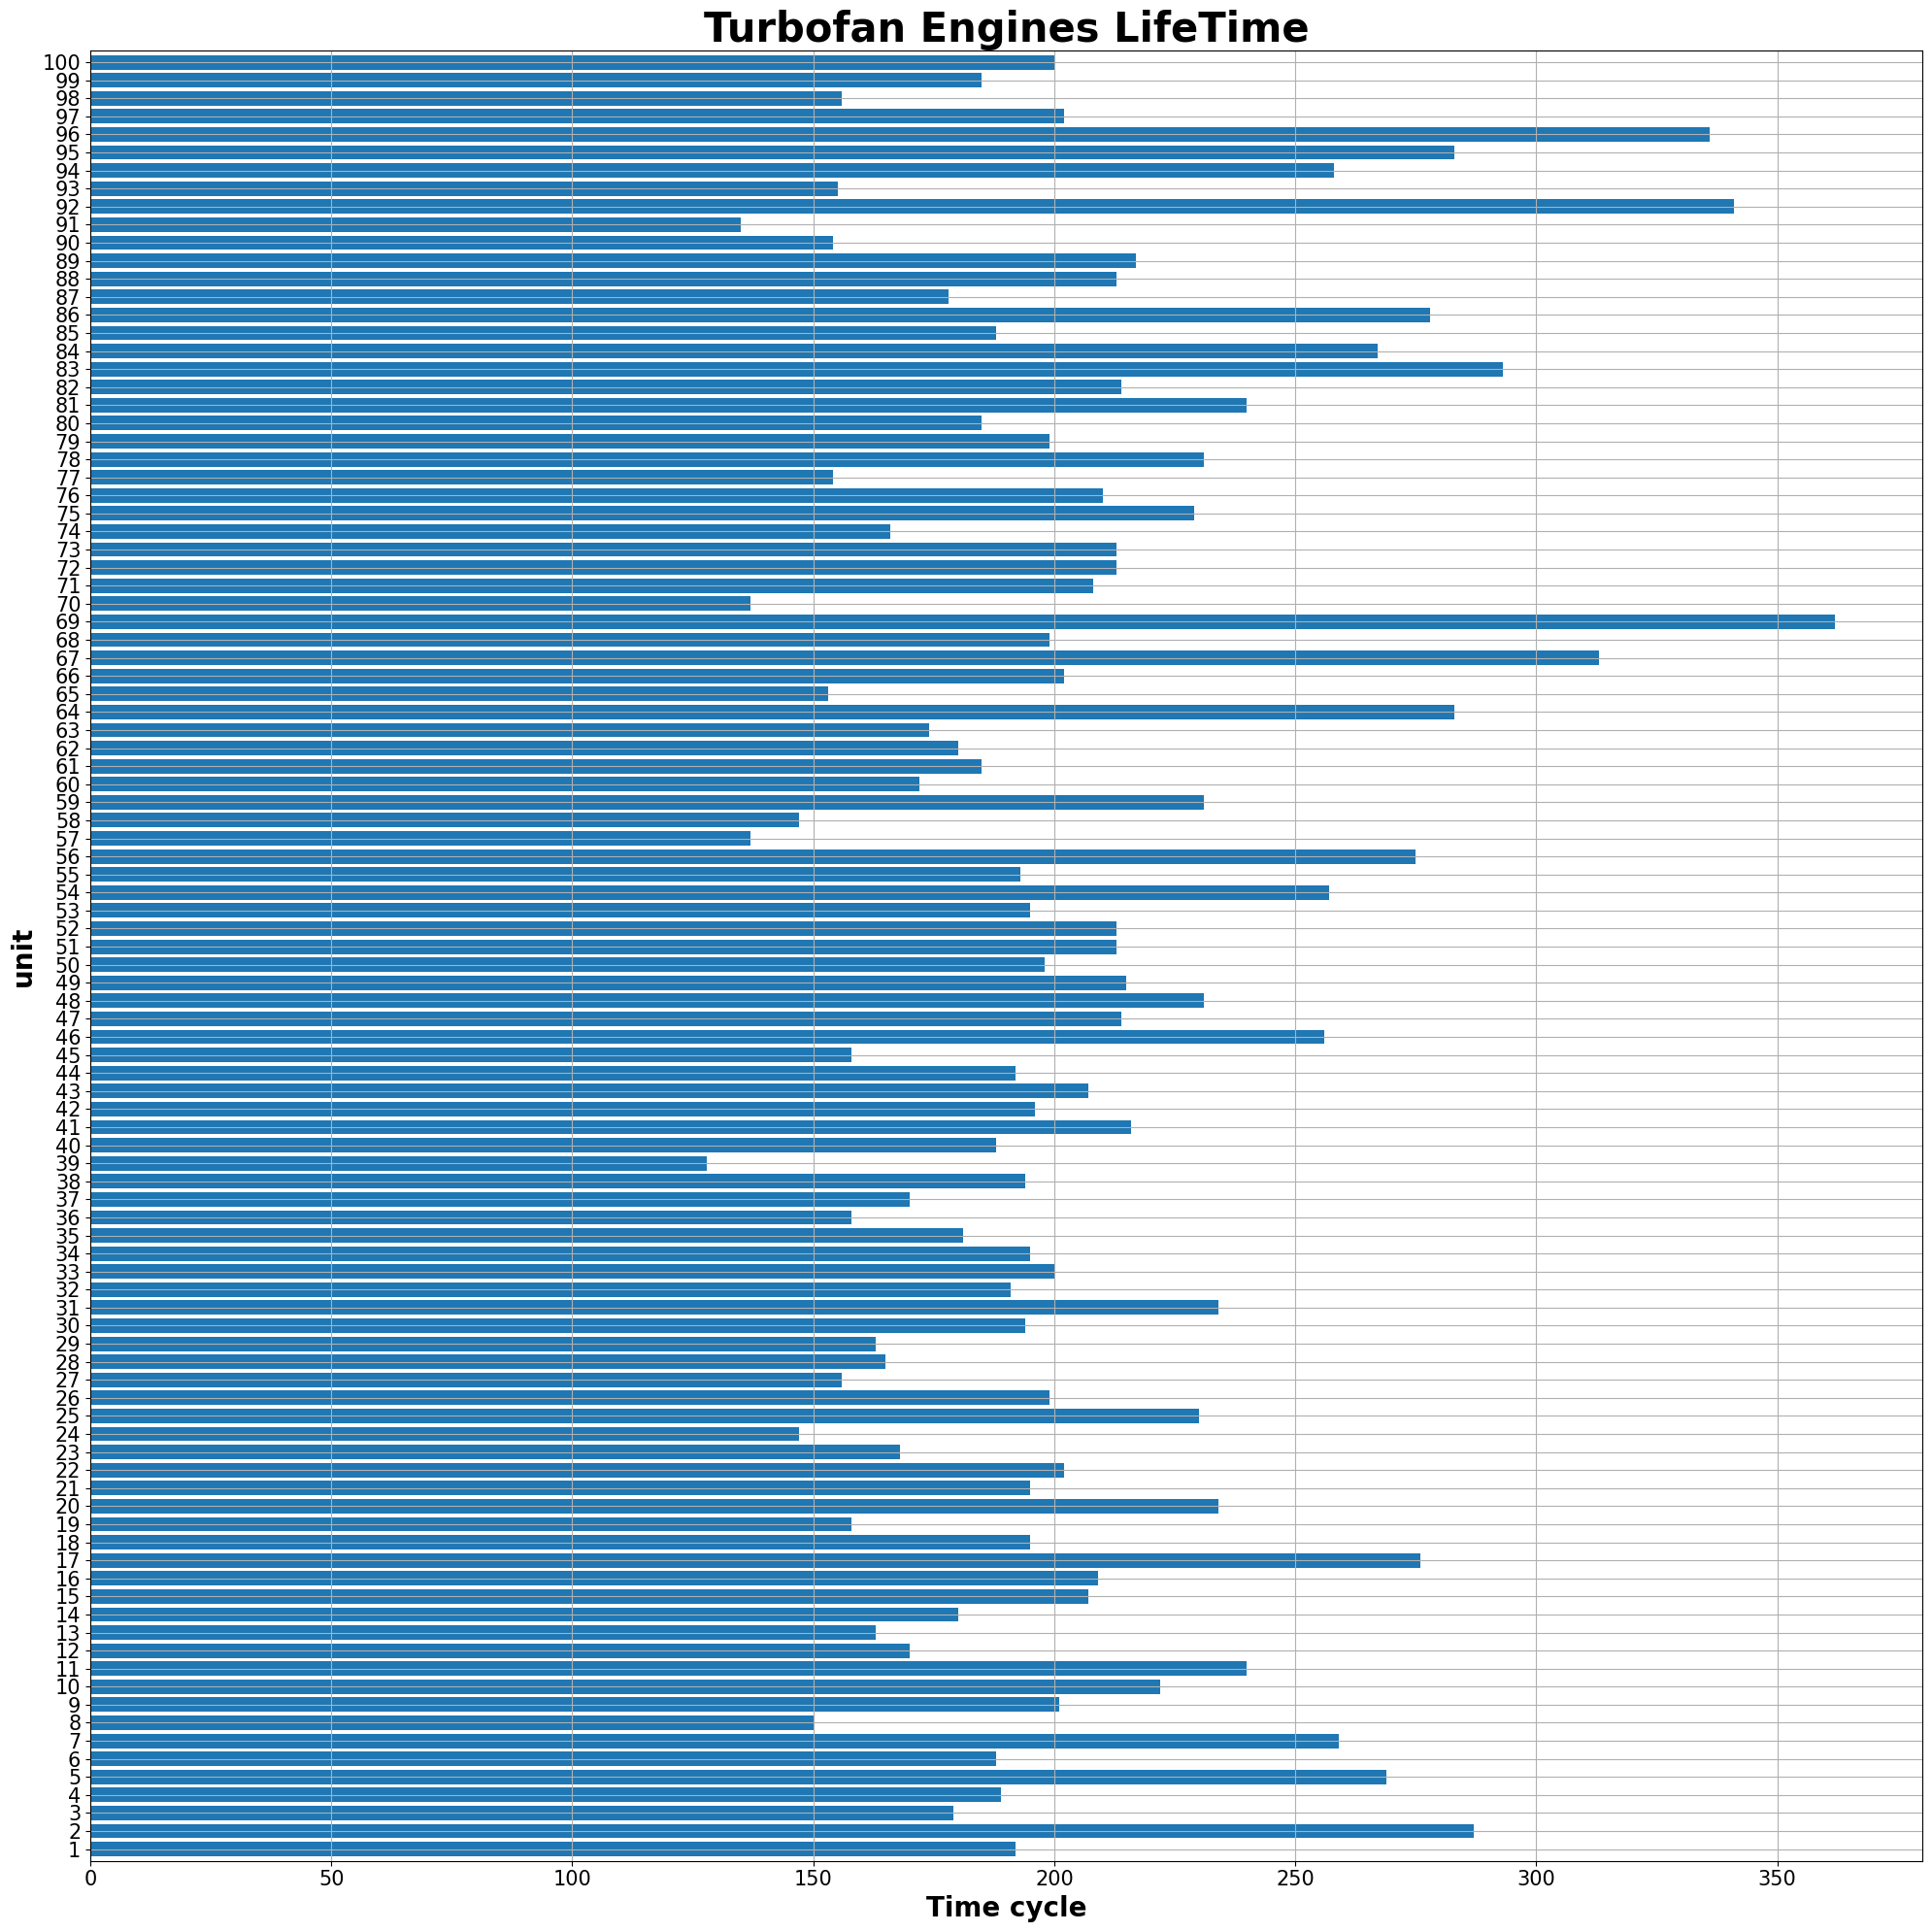

In [23]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,20))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

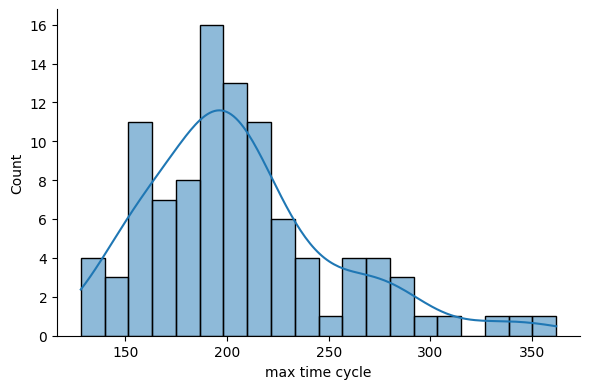

In [27]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=4,aspect=1.5)
plt.xlabel('max time cycle')

We notice that in most of the time, the maximum time cycles that an engine can achieve is between 190 and 210 before HPC failure.


Add RUL column to the data<br>
### **RUL corresponds to the remaining time cycles for each unit before it fails.**

In [28]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [29]:
train = add_RUL_column(train)

In [30]:
train[['unit_number','RUL']]

unit_number  RUL
0                1  191
1                1  190
2                1  189
3                1  188
4                1  187
...            ...  ...
20626          100    4
20627          100    3
20628          100    2
20629          100    1
20630          100    0

[20631 rows x 2 columns]

In [31]:
#Rul analysis
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1          192     0.0047     0.0005      100.0  518.67  644.21   
1            2          287     0.0076     0.0006      100.0  518.67  643.94   
2            3          179     0.0058     0.0005      100.0  518.67  643.93   
3            4          189     0.0059     0.0006      100.0  518.67  644.53   
4            5          269     0.0055     0.0005      100.0  518.67  644.02   

       s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0  1605.44  1432.52  14.62  ...  2388.35  8140.58  8.5227  0.03   398  2388   
1  1610.10  1431.17  14.62  ...  2388.26  8175.57  8.5377  0.03   398  2388   
2  1606.50  1438.51  14.62  ...  2388.20  8255.34  8.5363  0.03   399  2388   
3  1612.11  1434.12  14.62  ...  2388.17  8259.42  8.5462  0.03   399  2388   
4  1609.41  1434.59  14.62  ...  2388.23  8215.19  8.5410  0.03   398  2388   

    s_19   s_20     s_21  RUL  
0  100.0  39.18  23.4999  191  
1  100.0  39.24  23.6005  286  
2  100.0  39.23  23.5181  178  
3  100.0  39.21  23.5074  188  
4  100.0  39.29  23.5503  268  

[5 rows x 27 columns]

In [32]:
maxrul_u.shape

(100, 27)

**Discovering Correlations**

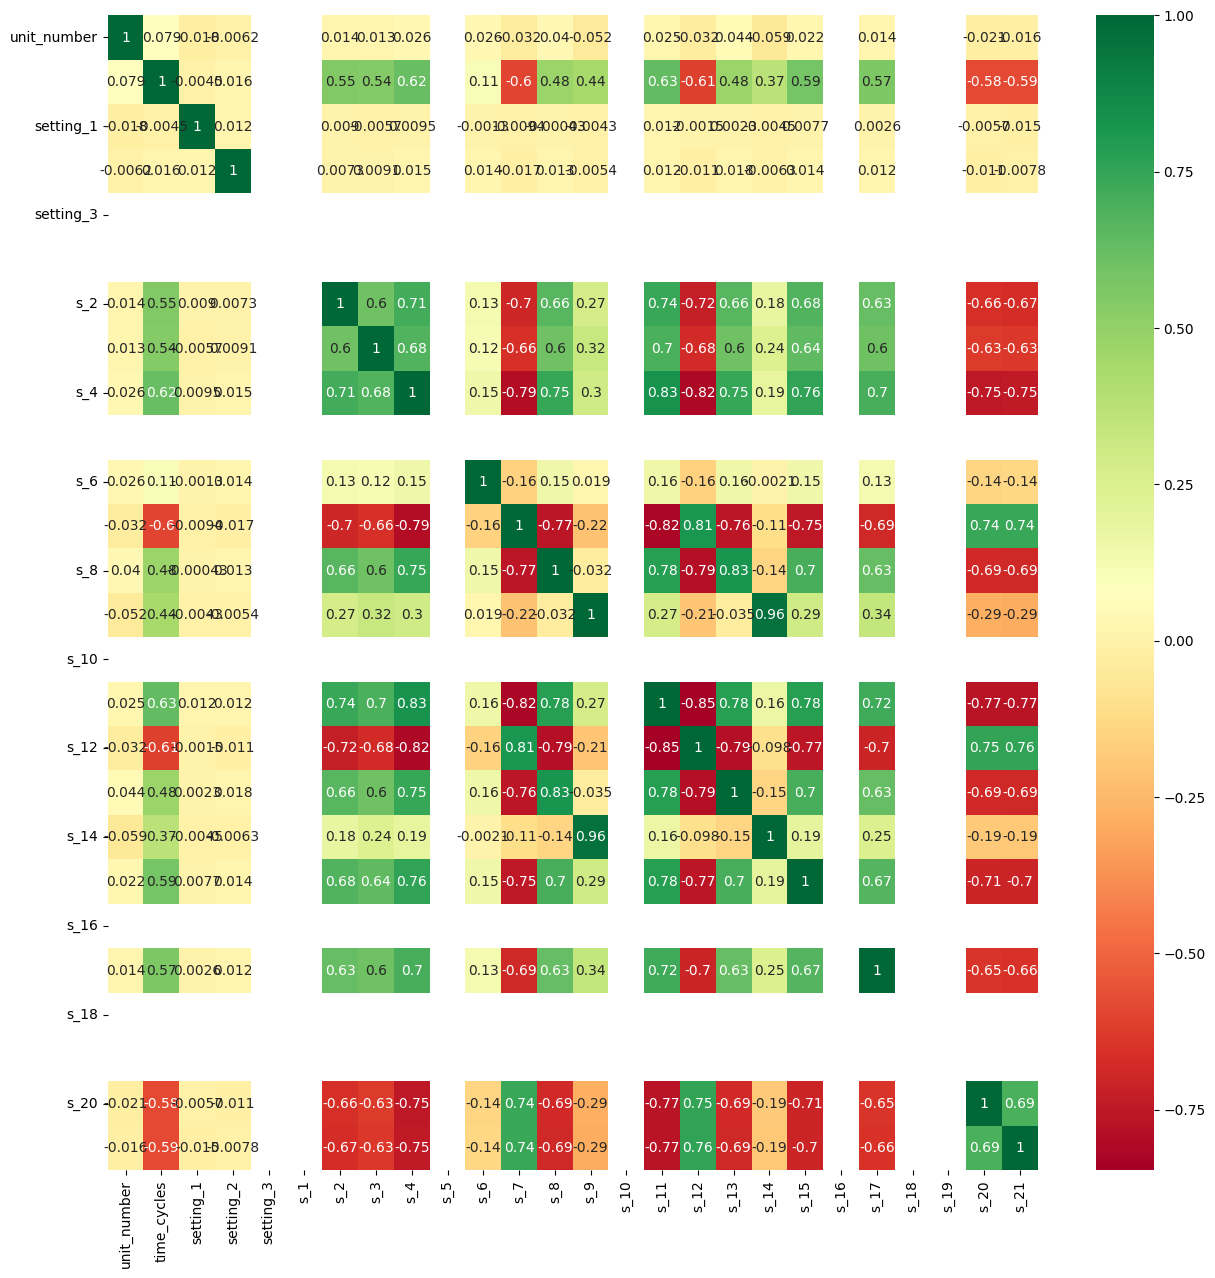

In [38]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<Axes: >

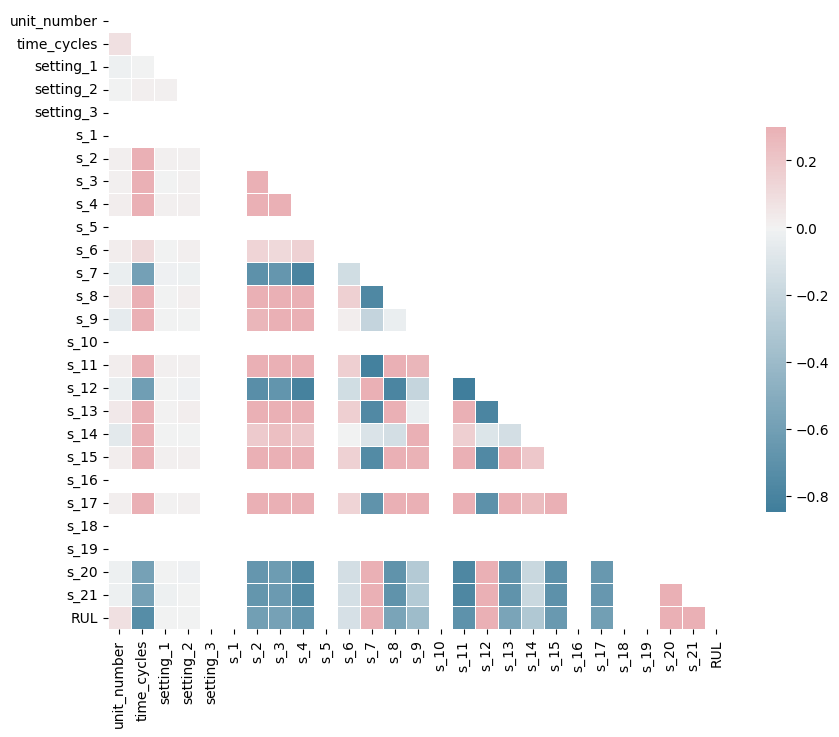

In [39]:
# Compute the correlation matrix
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

We notice that some features of our data-set are highly correlated with the target value RUL, other features present a low correlation which will be dropped later

First, let us match each sensor with its real signification

In [40]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary


{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

A low pressure compressor (LPC) and high pressure compressor (HPC) supply compressed high temperature, high pressure gases to the combustor. Low pressure turbine (LPT) can decelerate and pressurize air to improve the chemical energy conversion efficiency of aviation kerosene. High pressure turbines (HPT) generate mechanical energy by using high temperature and high pressure gas strike turbine blades. Low-pressure rotor (N1), high-pressure rotor (N2), and nozzle guarantee the combustion efficiency of the engine.

**Plotting the evolution of features (sensors) along with the evolution with RUL**

In [41]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

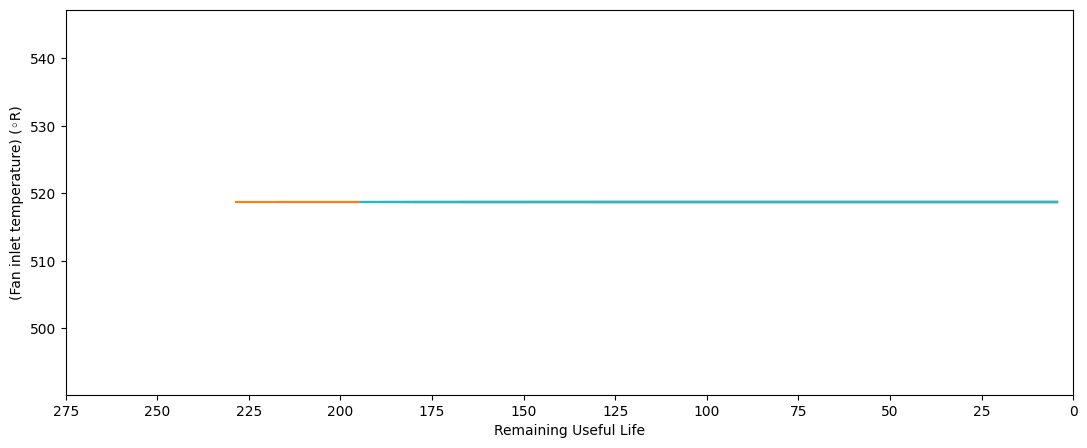

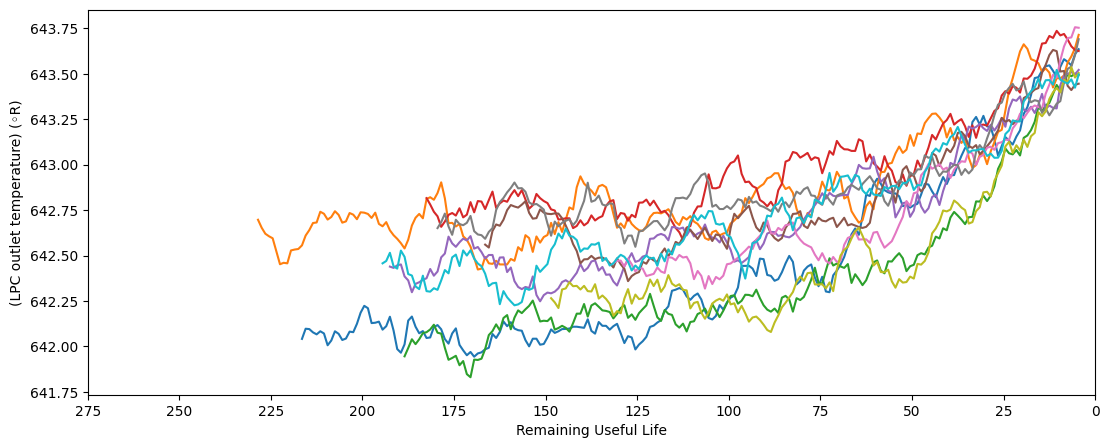

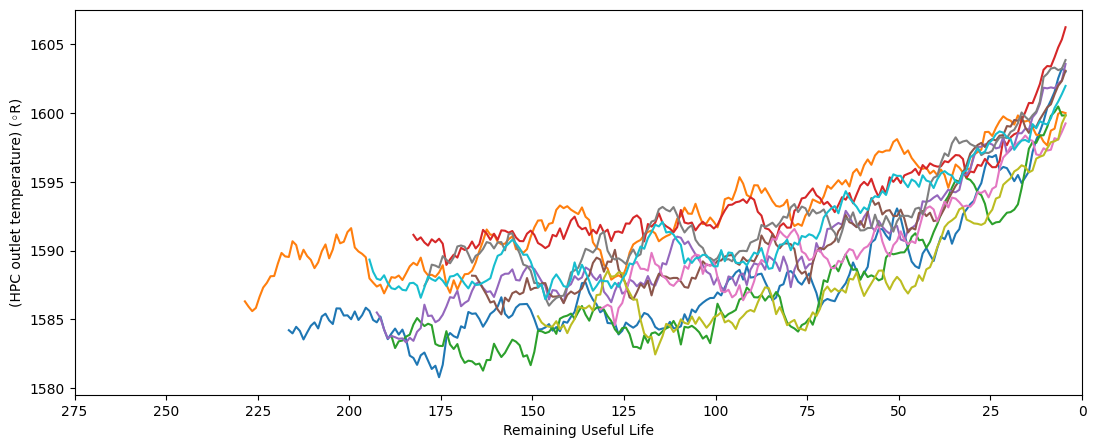

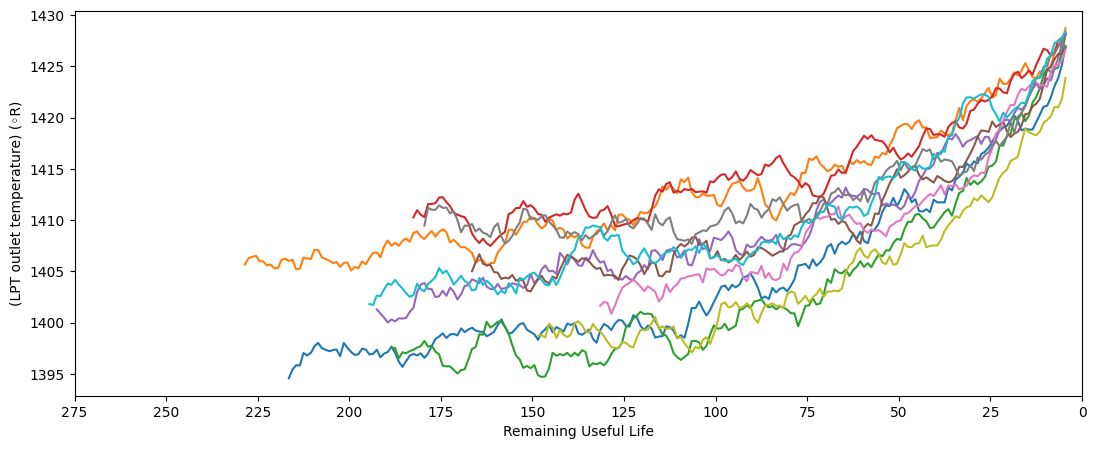

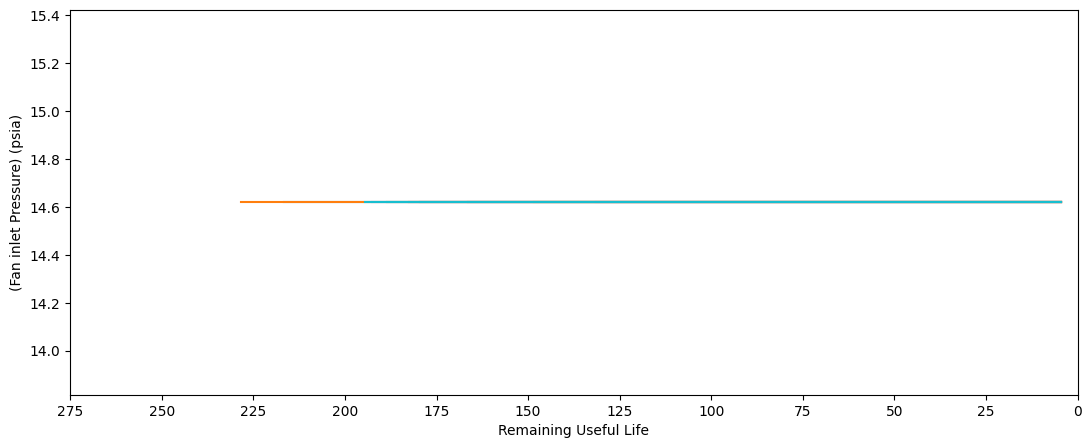

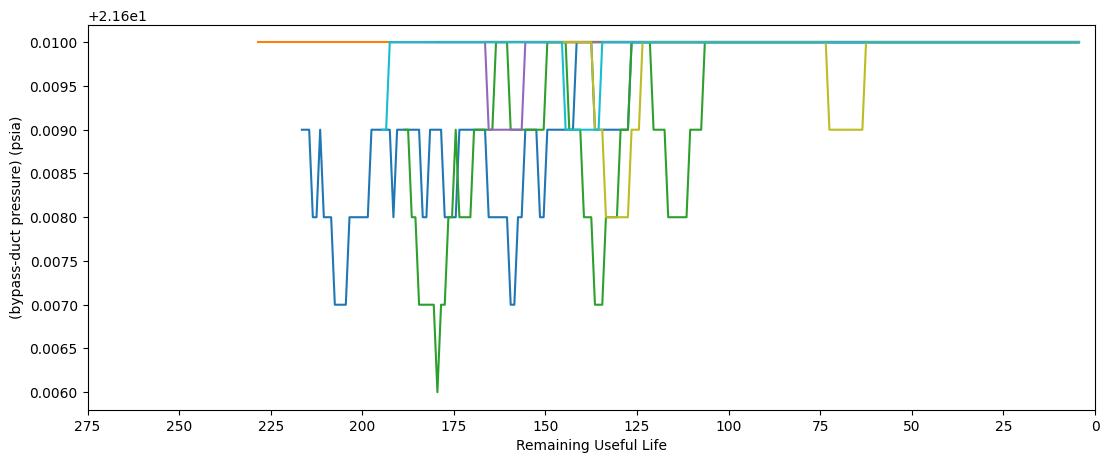

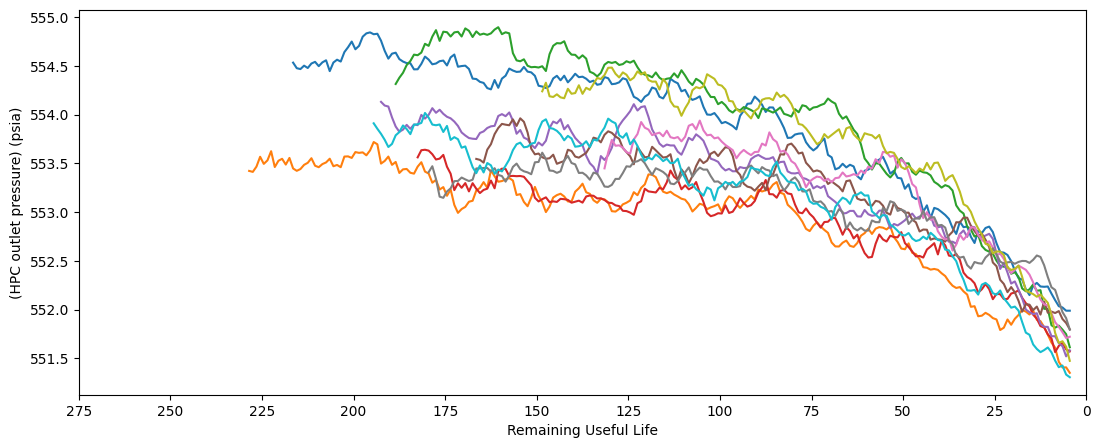

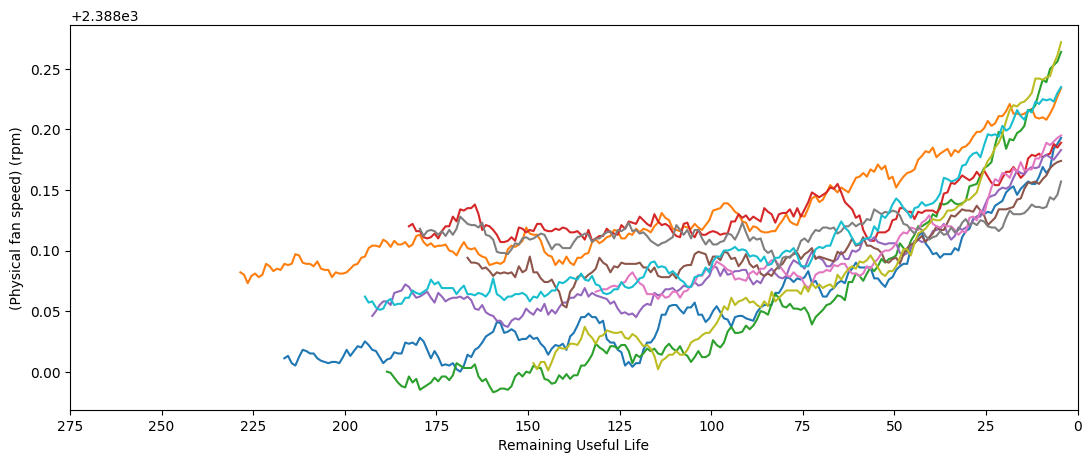

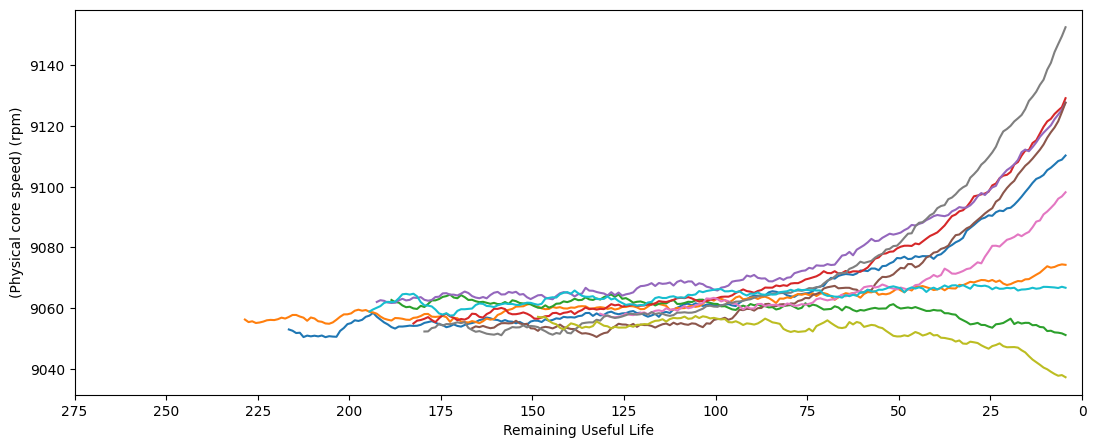

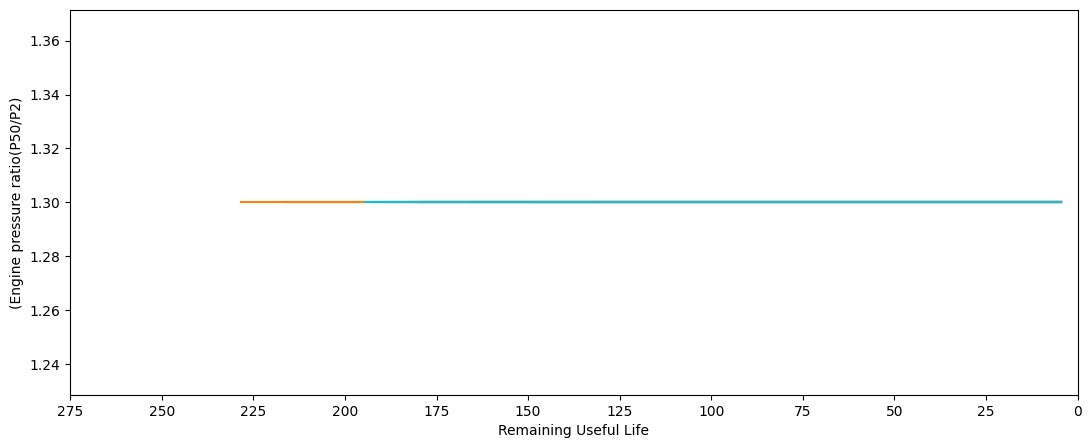

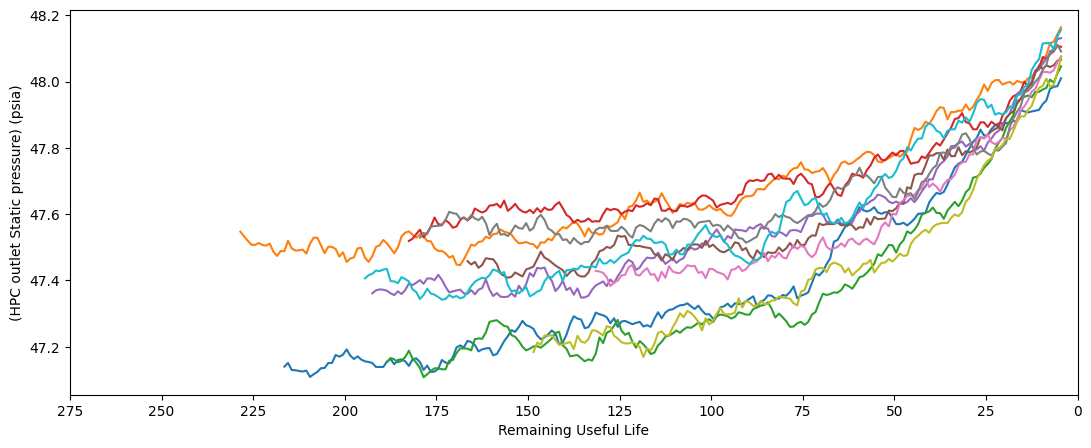

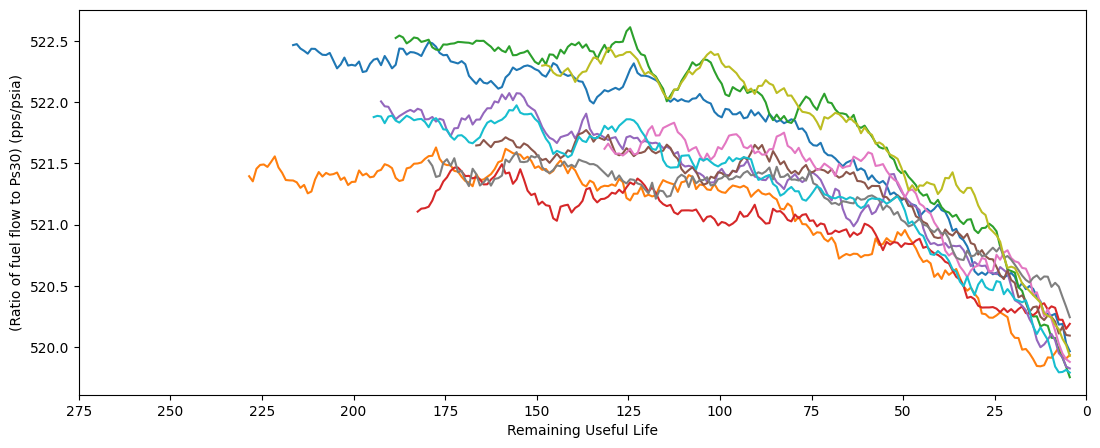

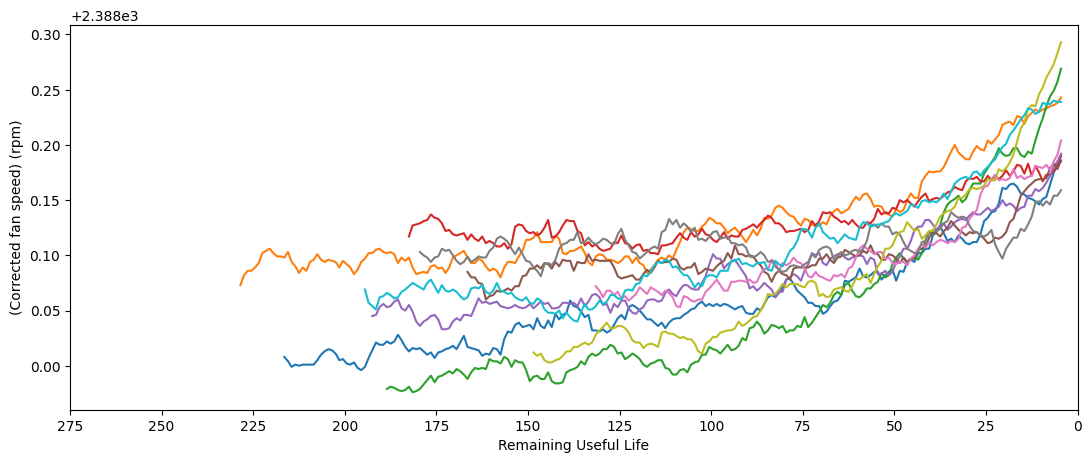

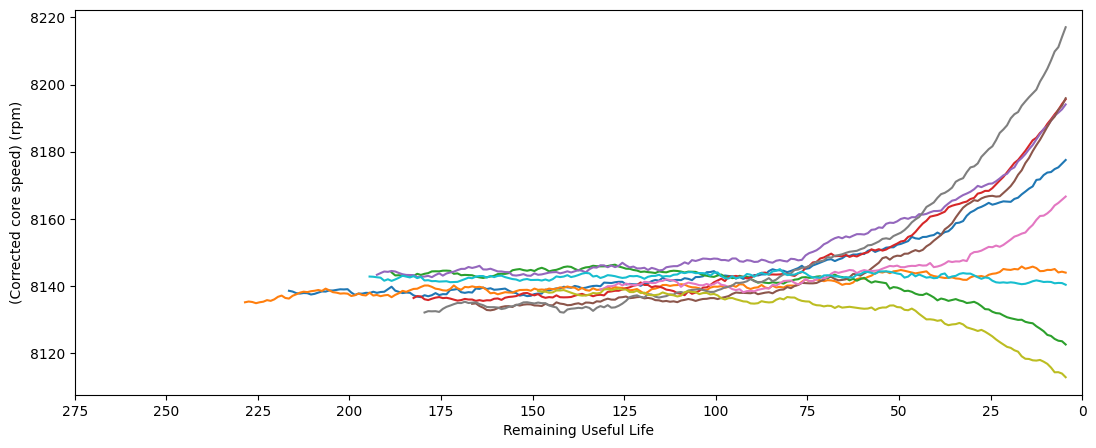

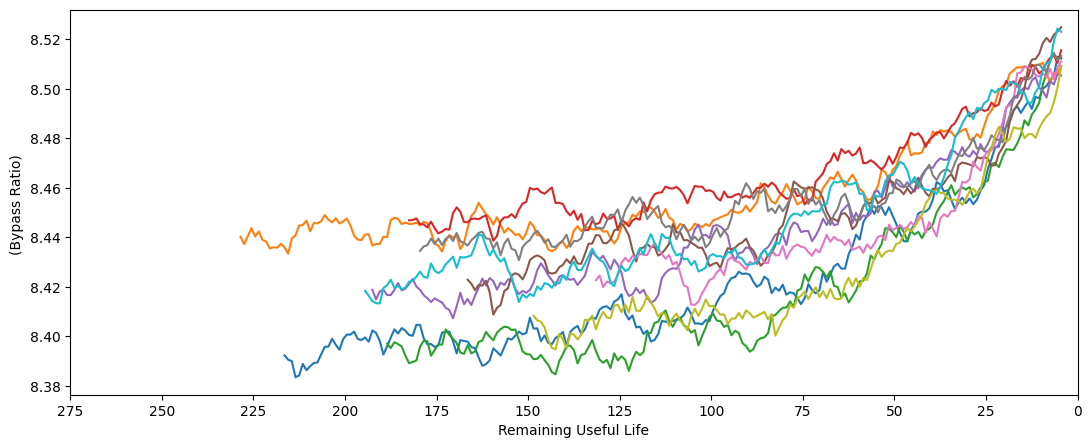

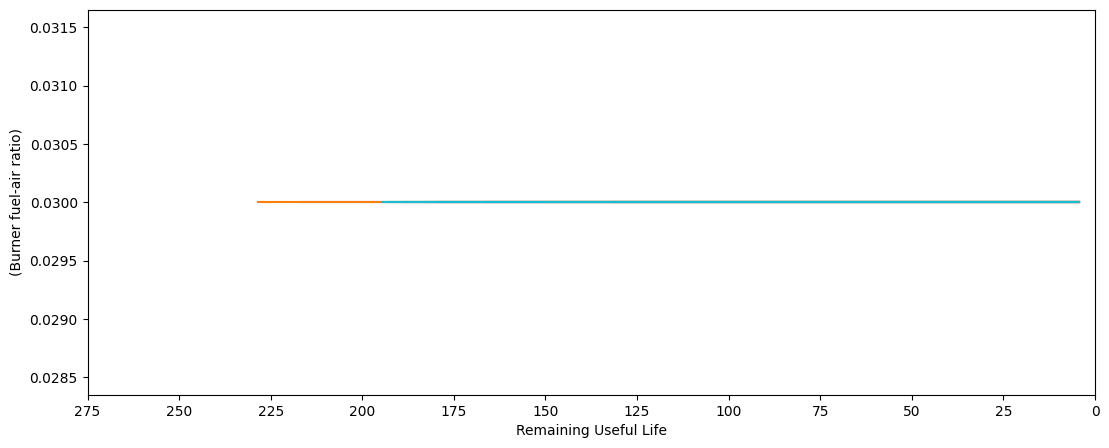

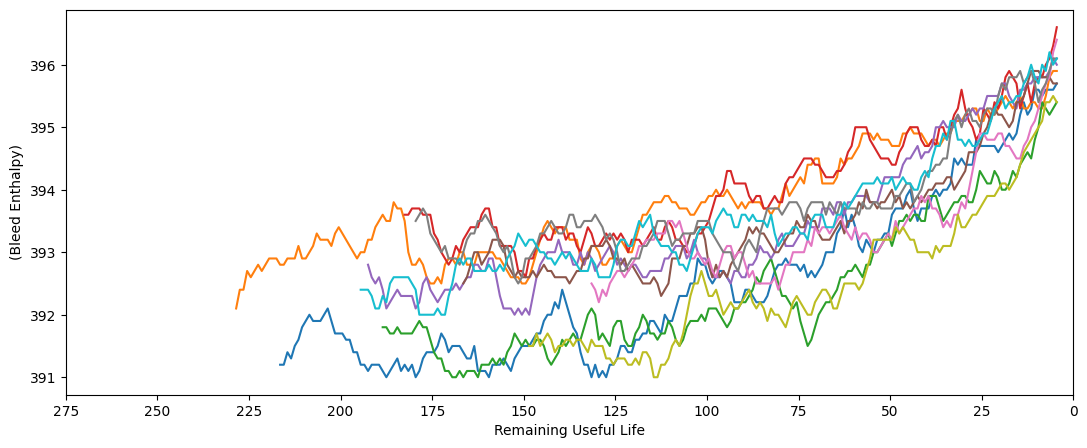

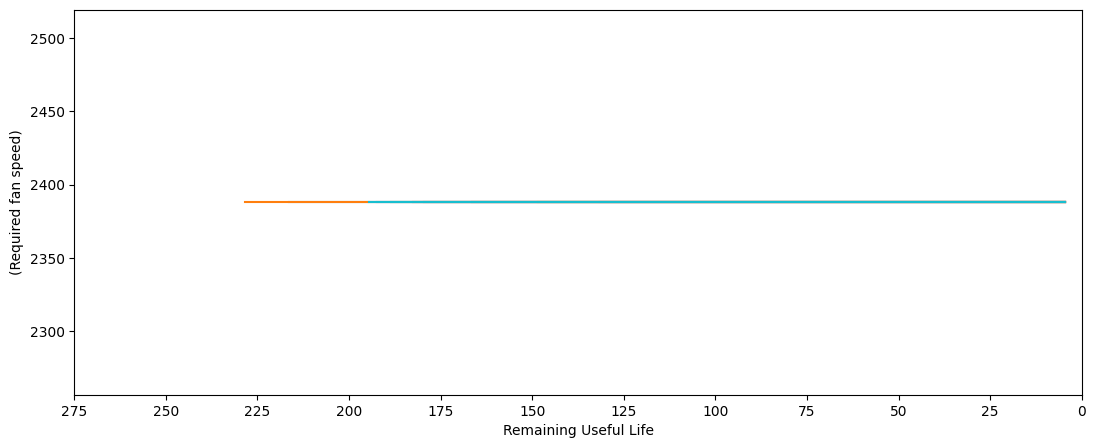

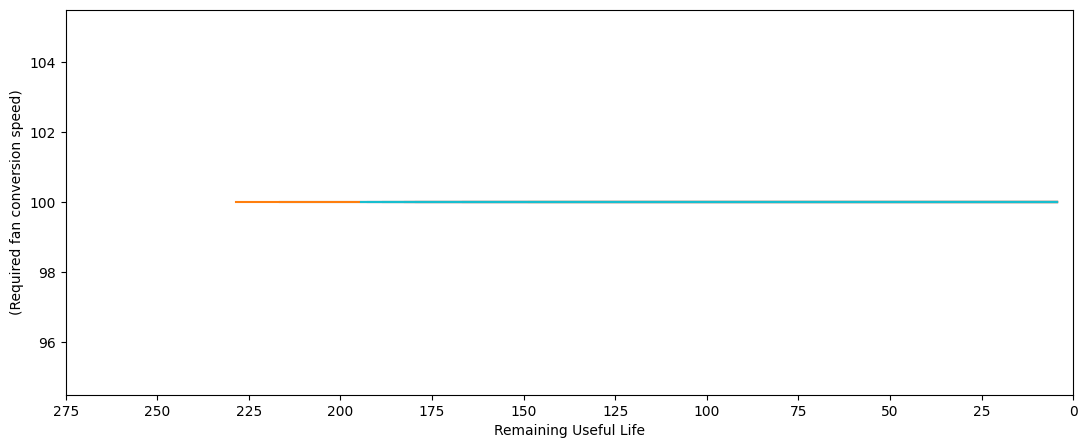

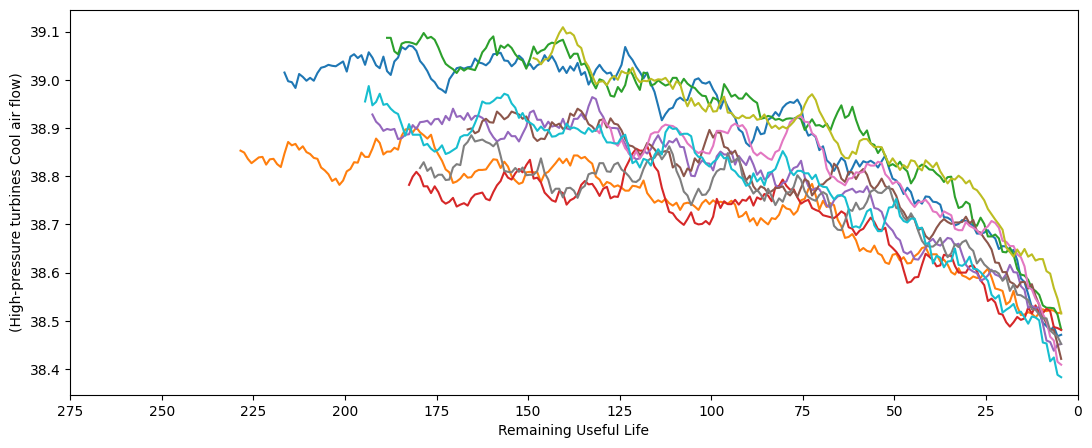

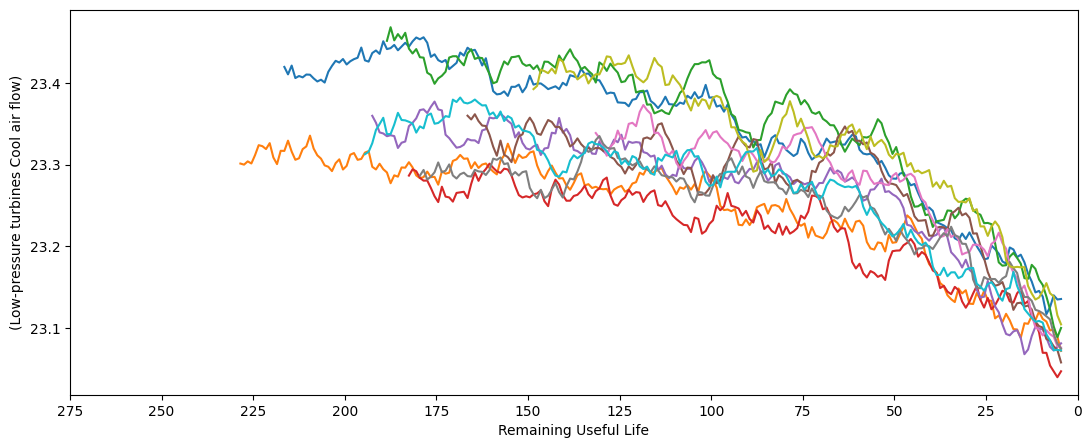

In [42]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

These plots show that some sensors are constant. Hence they don't influence the RUL ==> we can drop those ones. (later)



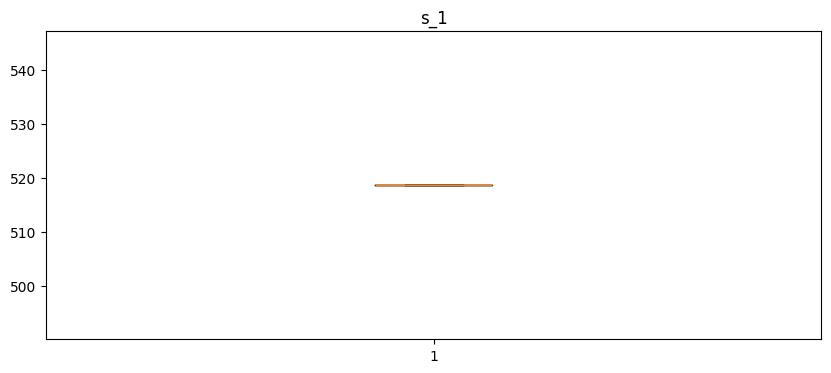

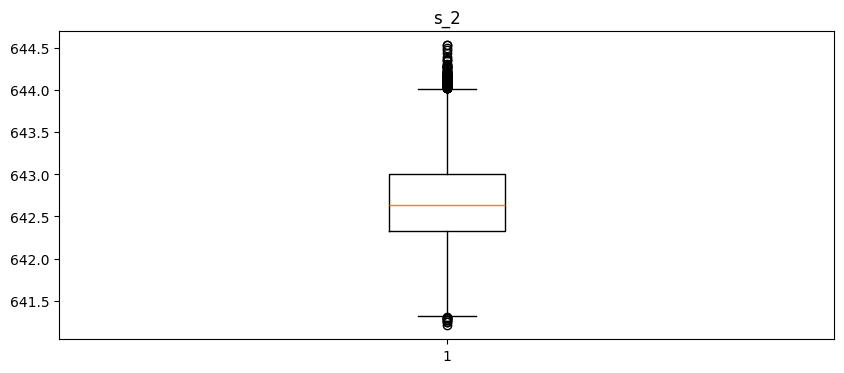

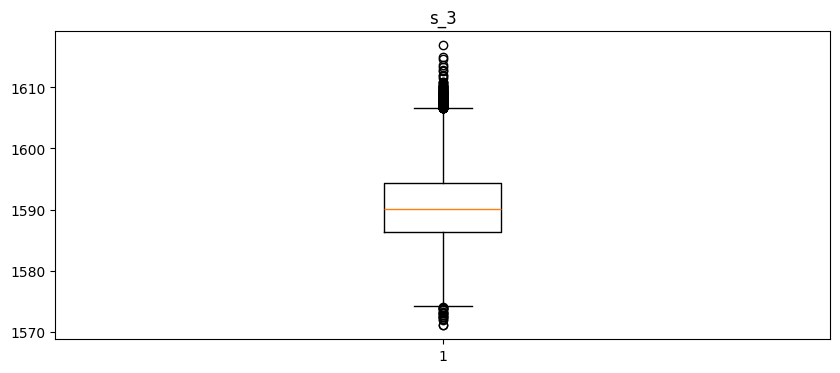

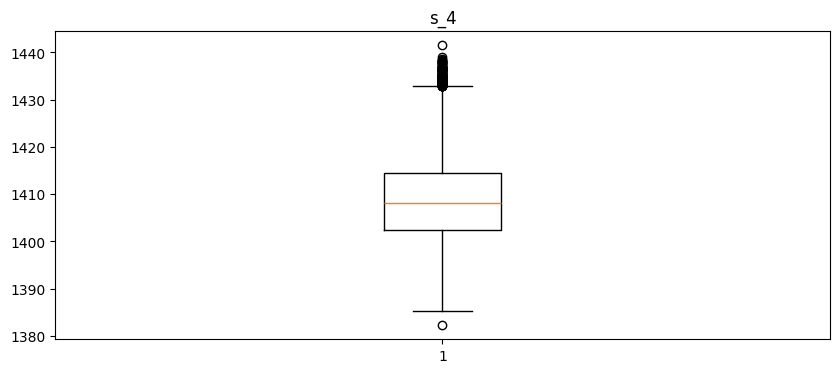

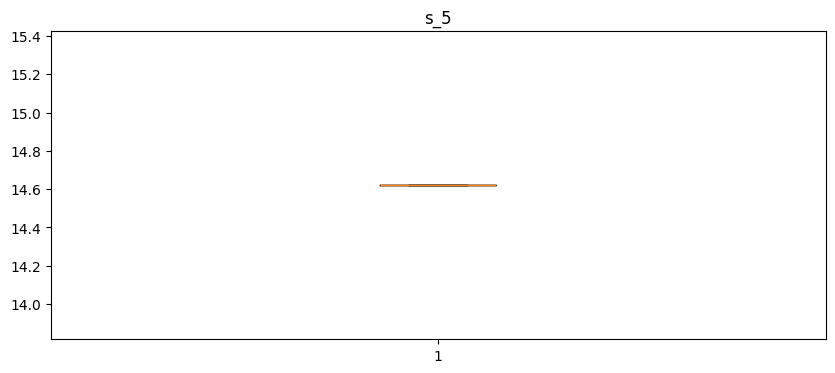

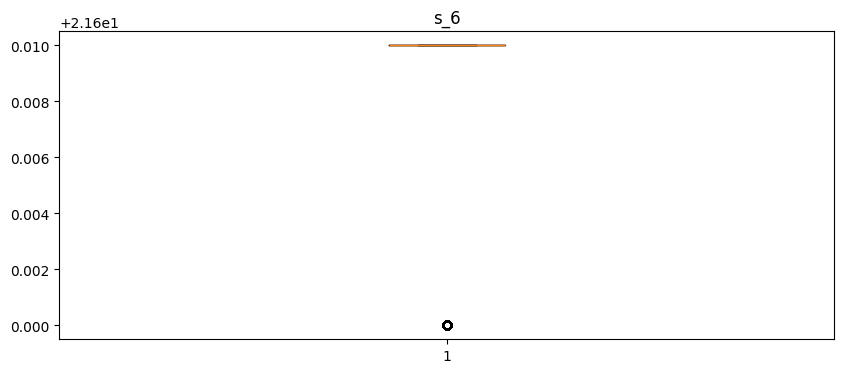

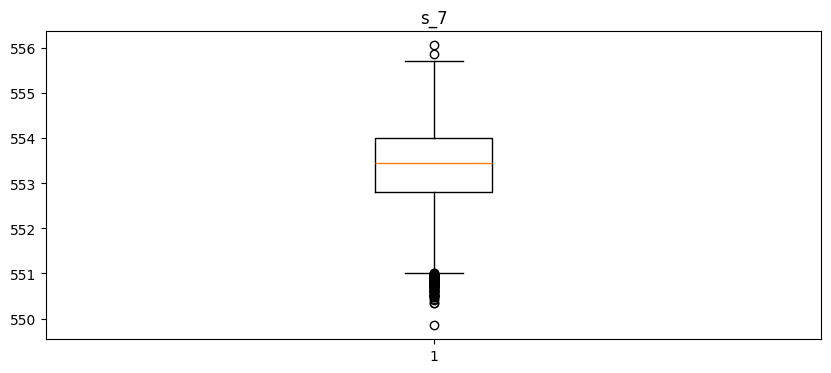

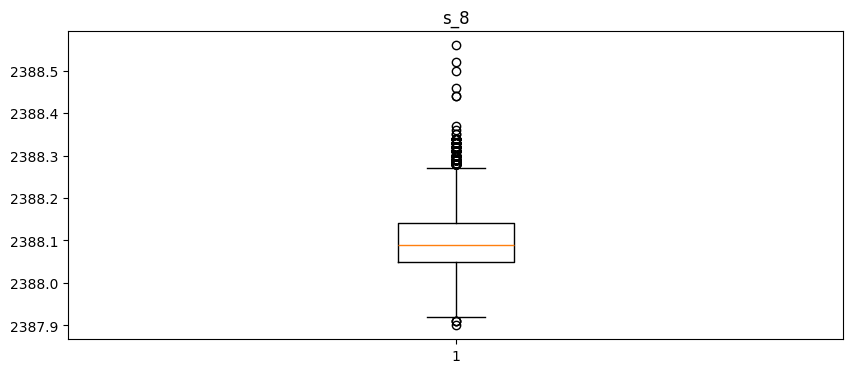

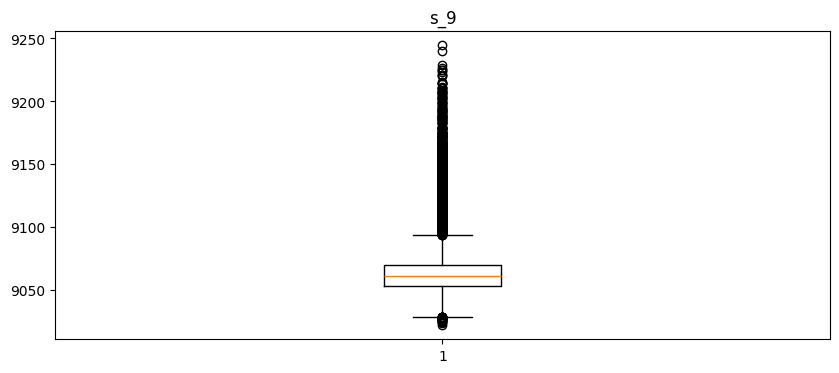

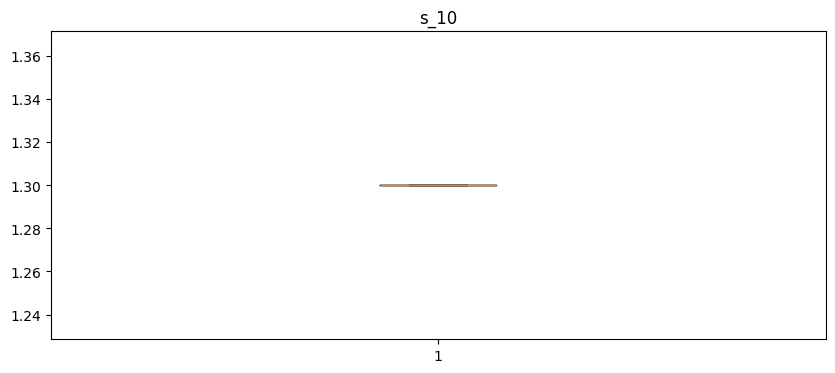

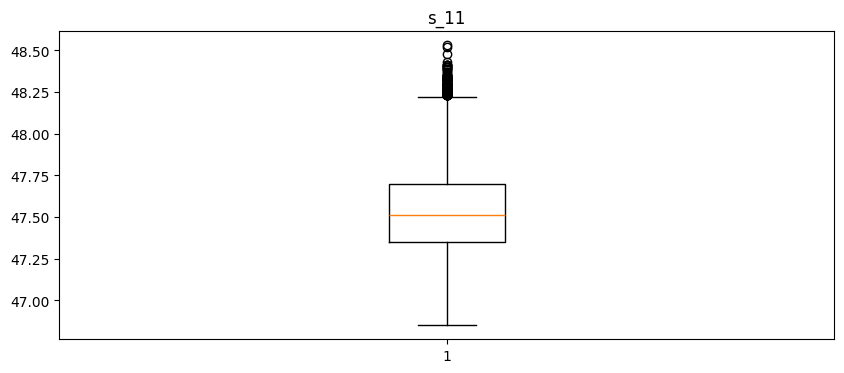

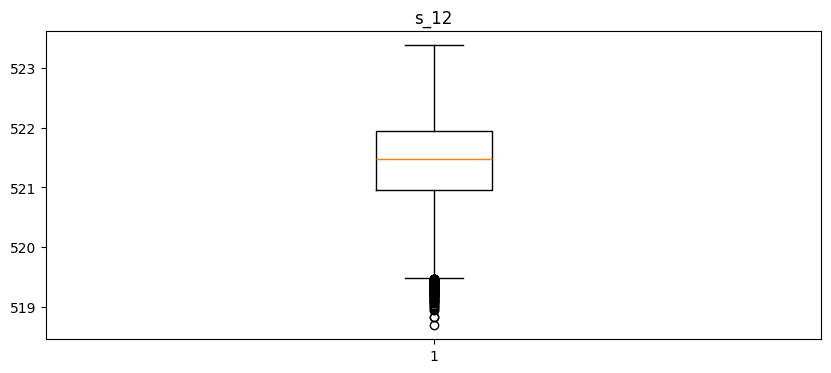

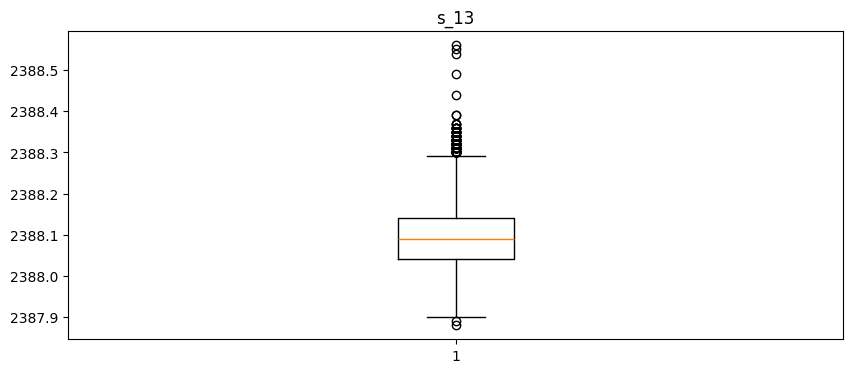

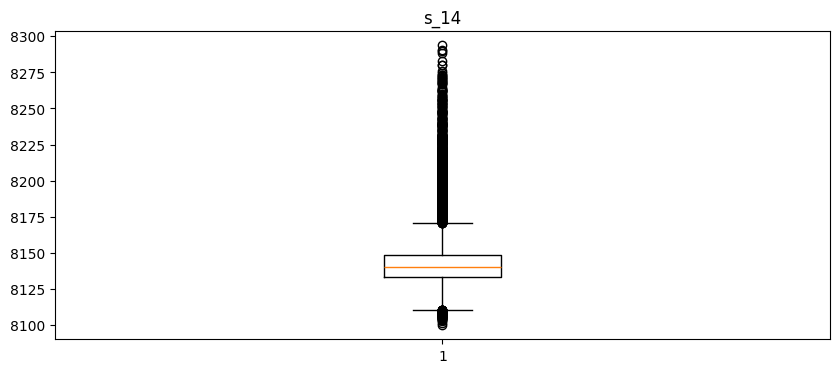

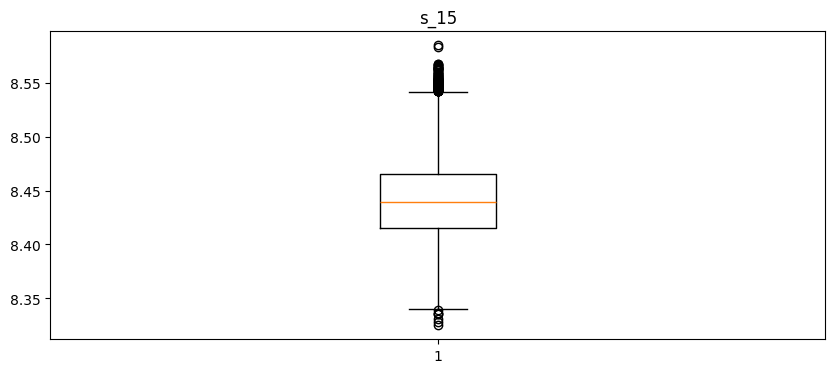

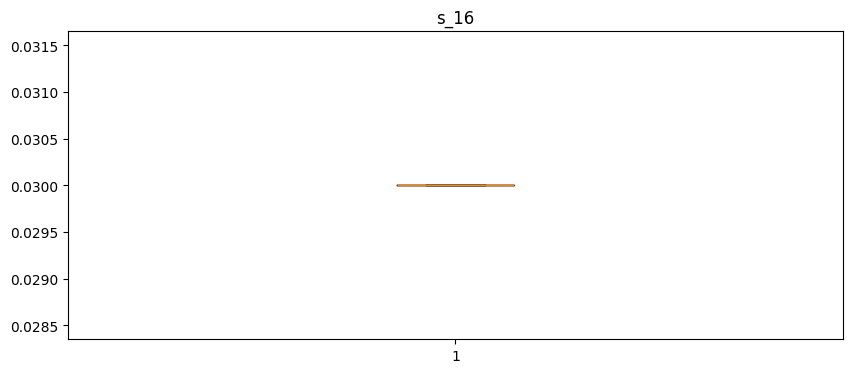

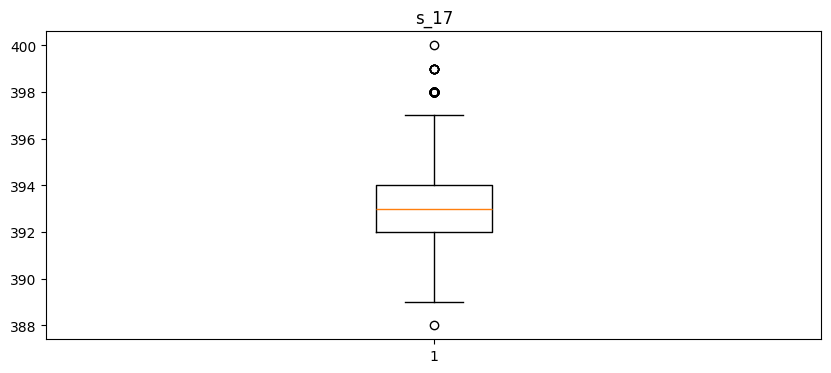

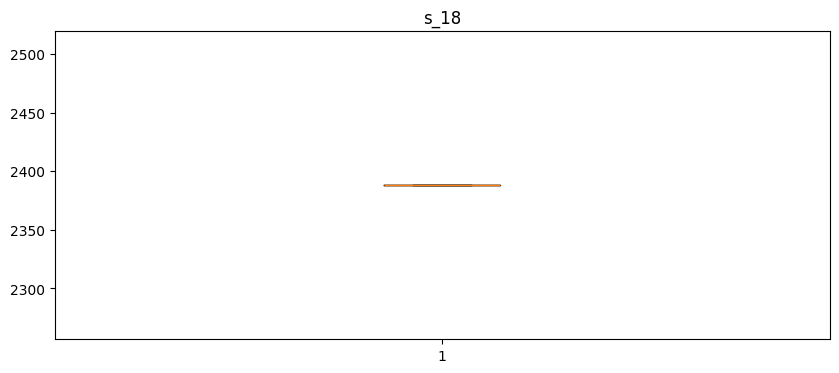

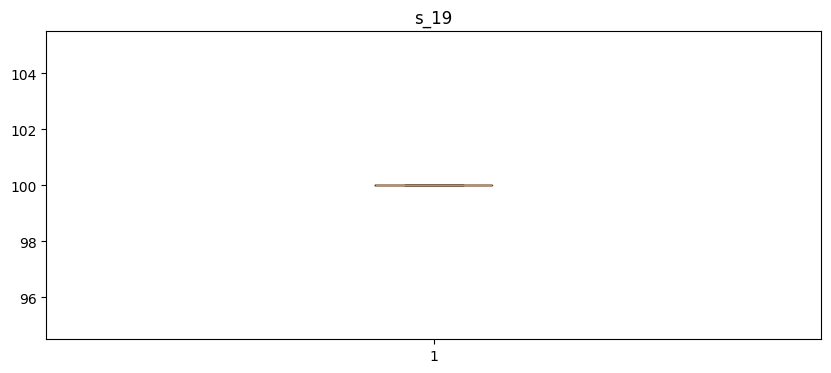

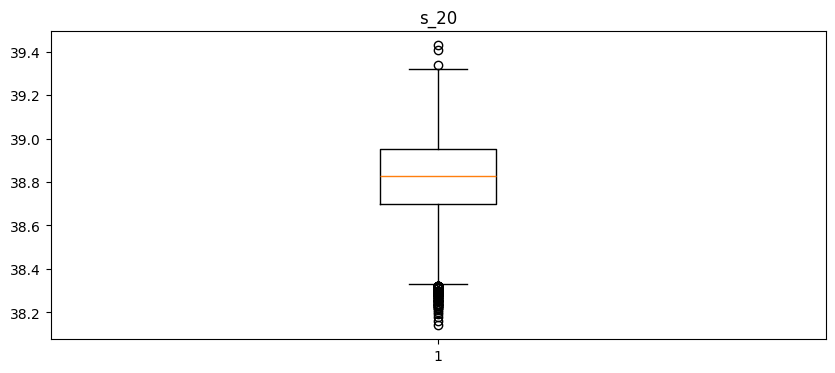

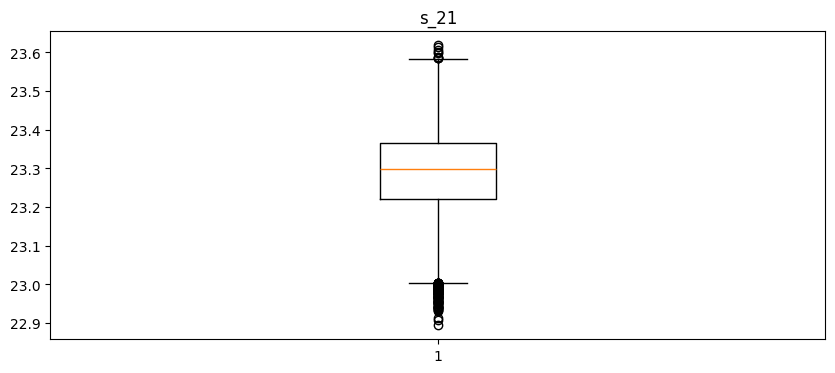

In [43]:
for x in sensor_names:
    plt.figure(figsize=(10,4))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()


Observing the signal plots and the boxplots, we notice that the sensors 1,5,10,16,18,19 are constant, furthermore, we observe that the other sensors aren't well distributed and there are many outliers, then we should scale our data



In [44]:
train.loc[:,'s_1':].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   
RUL   20631.0   107.807862  6.888099e+01     0.0000    51.0000   103.0000   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184  
RUL    155.0000   361.0000

The last point is more supported by the fact that the statistic properties of sensors data show that they don't have the same scale and they don't follow a normal distribution ==> this can be solved by performing a Minmax scaler on our data.



# Dimensionality Reduction

In [45]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [46]:
X_train.shape

(14441, 22)

In [47]:
y_train.shape

(14441,)

In [48]:
#Scaling the data: Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Tester = X_test.copy()
Trainer = X_train.copy()

#Droping the target variable
X_train.drop(columns=['RUL','s_1','s_5','s_6','s_10','s_16','s_18','s_19'], inplace=True)
X_test.drop(columns=['RUL','s_1','s_5','s_6','s_10','s_16','s_18','s_19'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
Validator = X_valid.copy()
X_valid.drop(columns=['s_1','s_5','s_6','s_10','s_16','s_18','s_19'], inplace=True)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

In [49]:
print(X_valid_s.shape)
print(y_valid.shape)

(100, 14)
(100, 1)


array([[<Axes: title={'center': 's_2'}>, <Axes: title={'center': 's_3'}>,
        <Axes: title={'center': 's_4'}>, <Axes: title={'center': 's_7'}>],
       [<Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>],
       [<Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>,
        <Axes: title={'center': 's_17'}>],
       [<Axes: title={'center': 's_20'}>,
        <Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >]],
      dtype=object)

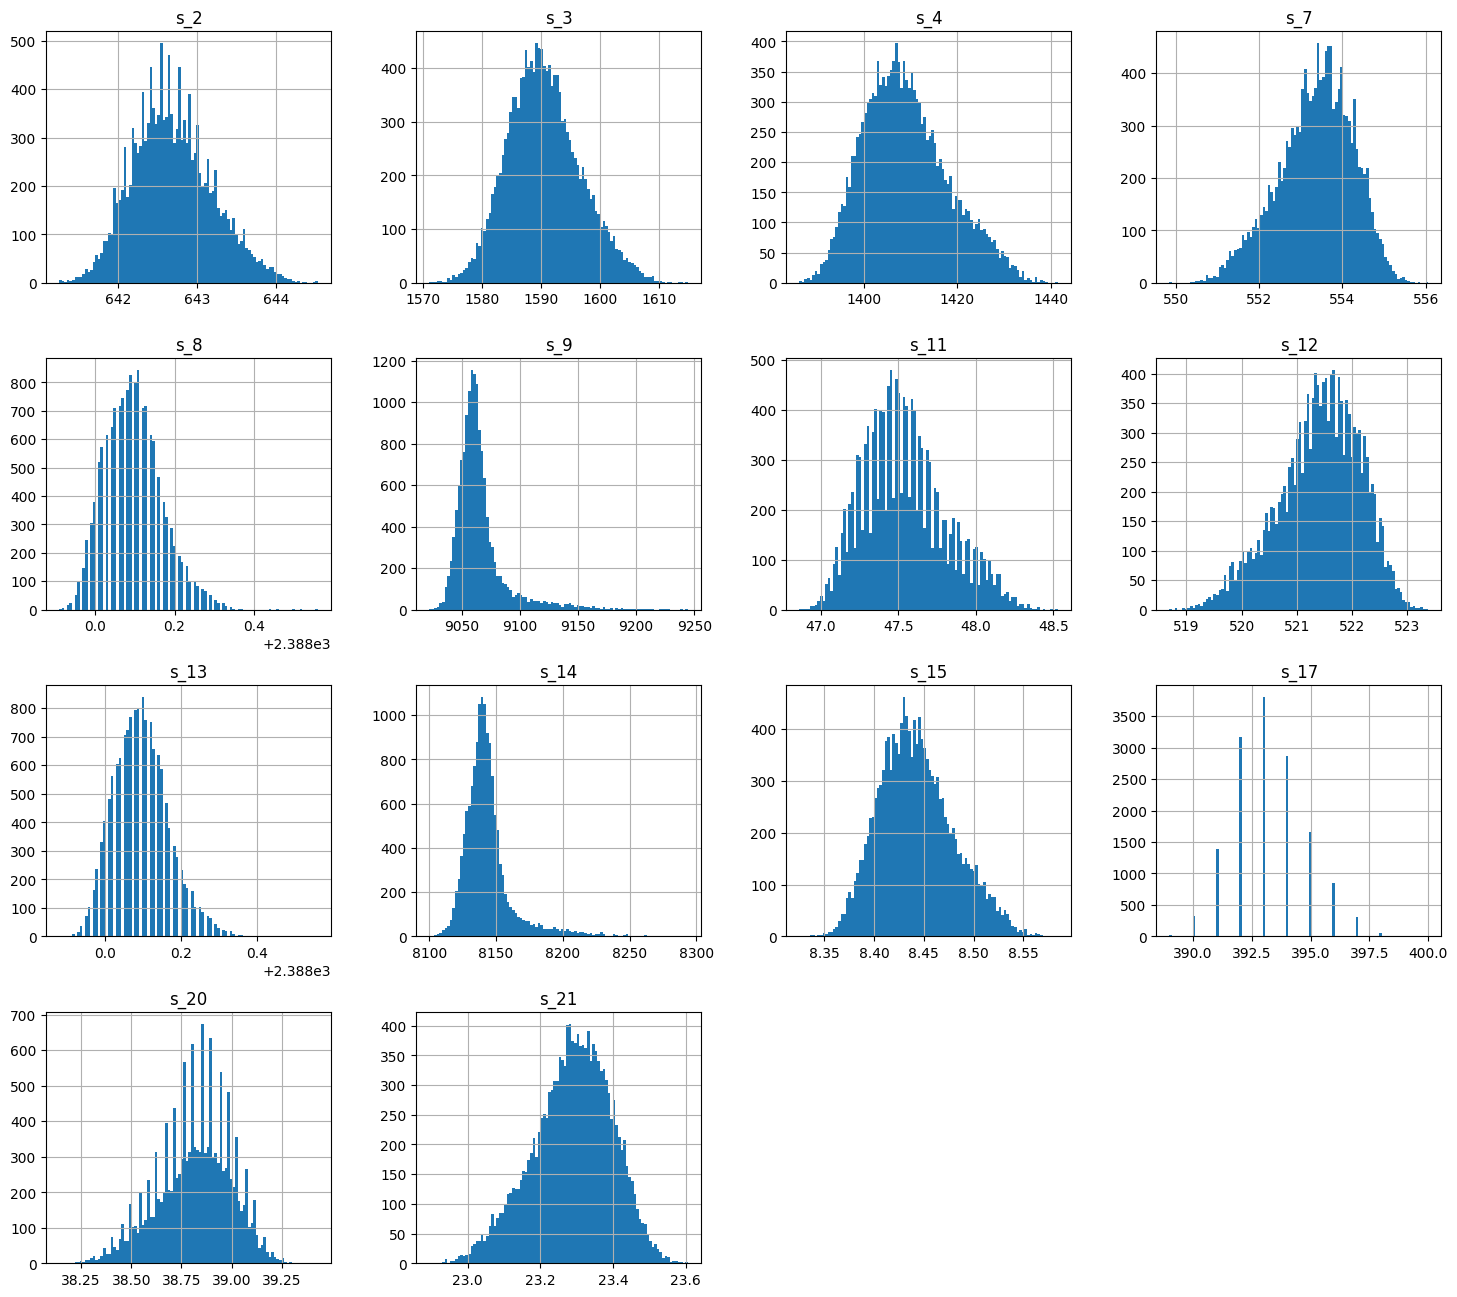

In [50]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(Trainer,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

# Models Implementation and instantiation

Defining evaluation functions

In [51]:
#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

## 1) Random forest

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_s, y_train)

print(grid.best_score_ , grid.best_params_)
#max_features=5,

0.6417648150900467 {'max_depth': 10, 'n_estimators': 120}


the model is overfitting to train/test

In [53]:
rf=RandomForestRegressor(n_estimators=90,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_s, y_train)
# predict and evaluate
y_hat_train = rf.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:35.17174929044478, R2:0.7430304746805648
test set RMSE:44.12656814856002, R2:0.5748919872018761
valid set RMSE:34.742754209743154, R2:0.301013249594164


the model is overfitting to train/test

In [54]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

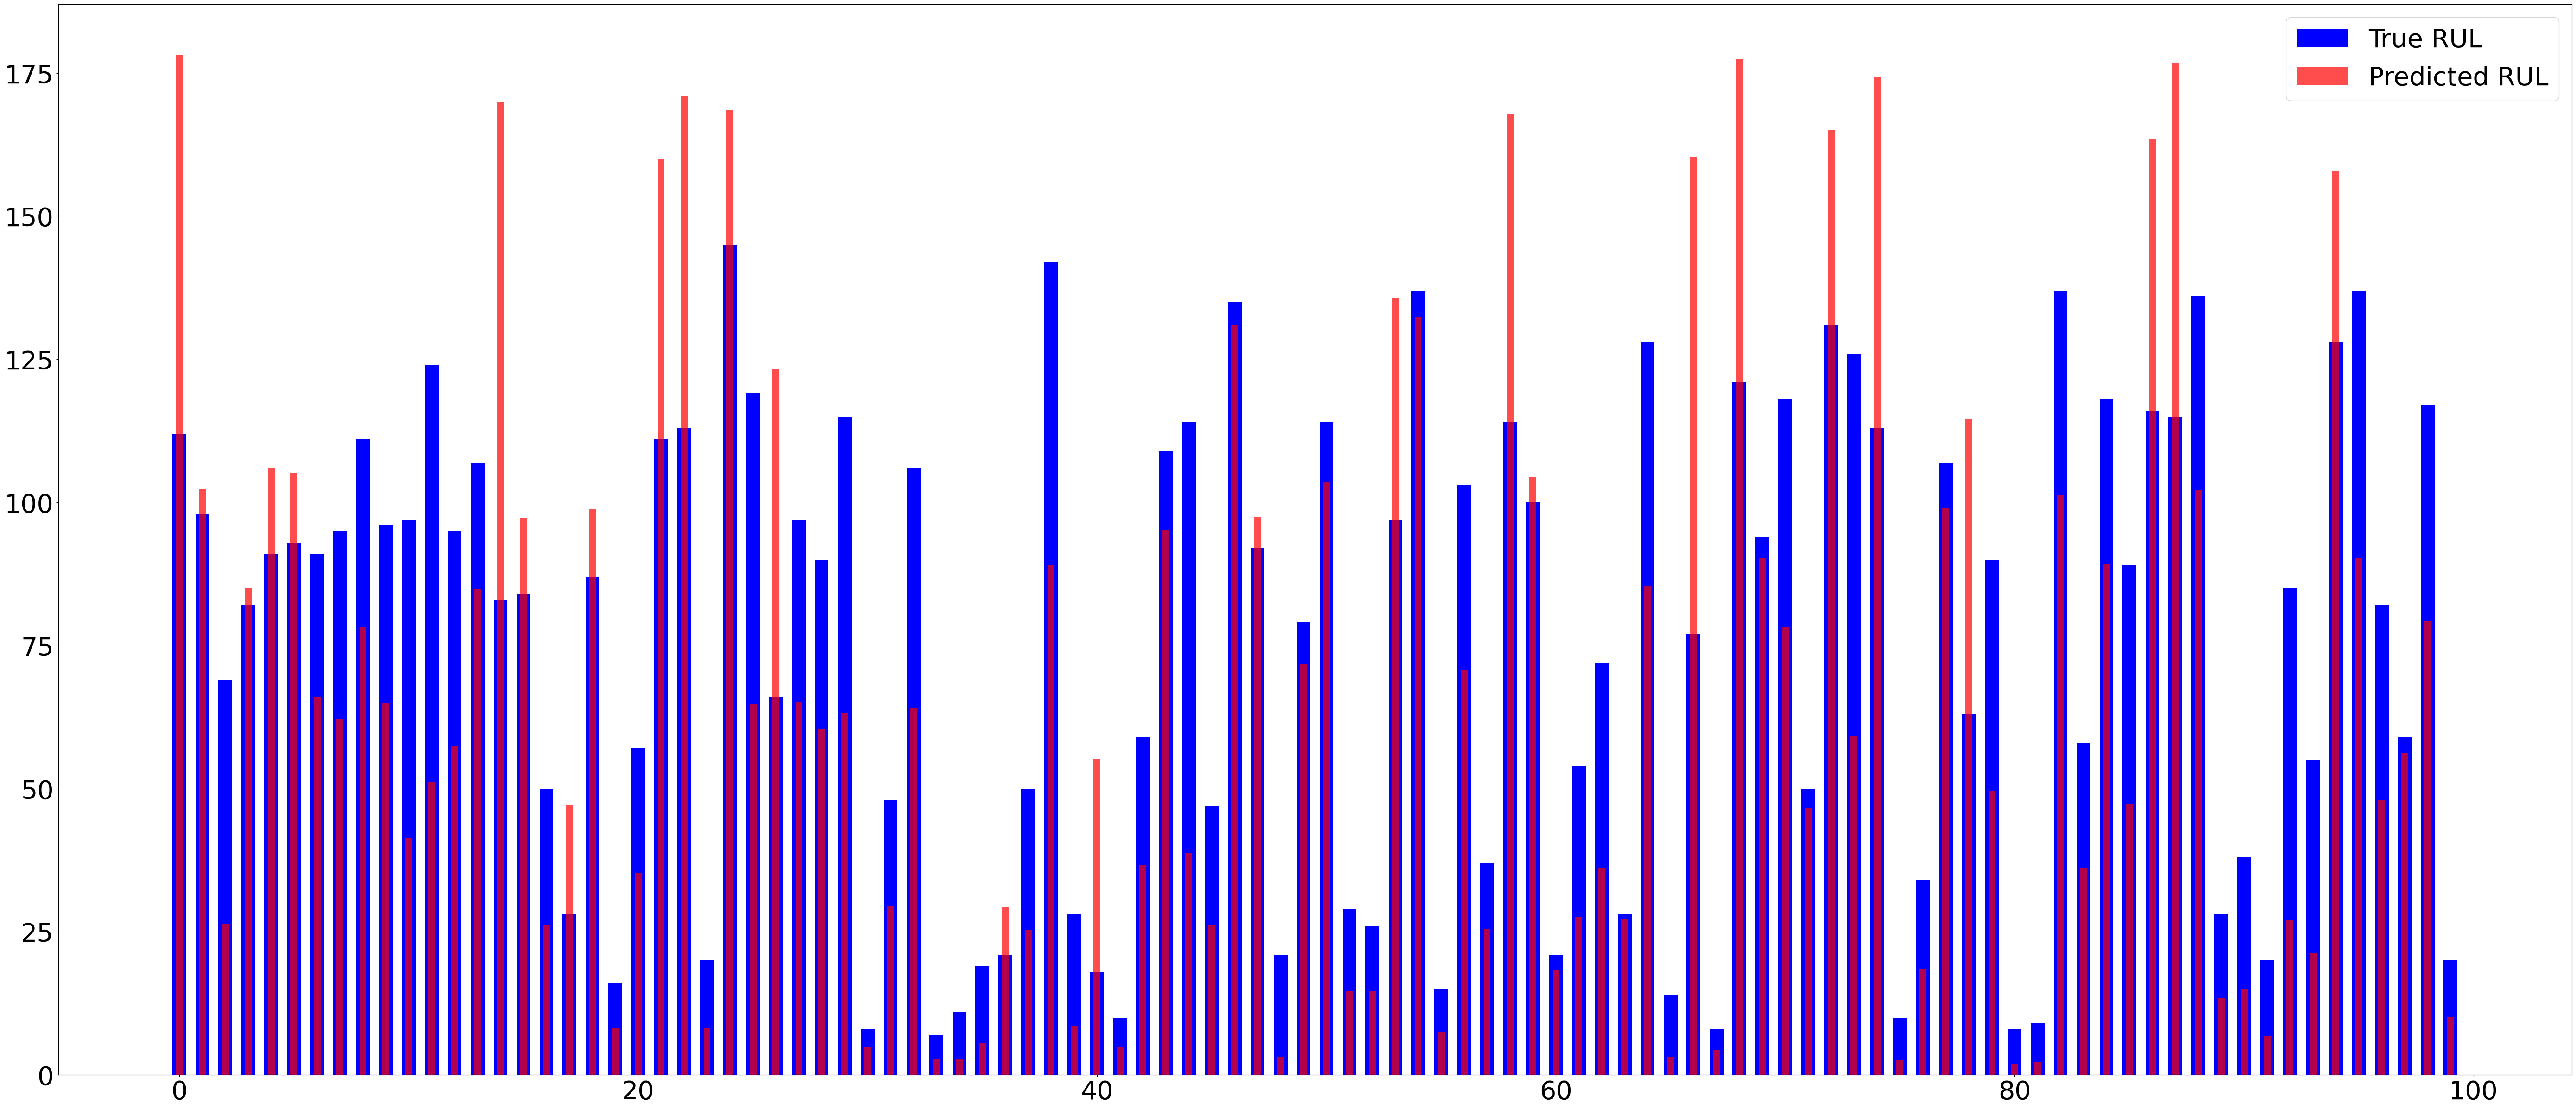

In [55]:
plot_predActual(y_valid, y_hat_valid)

In [56]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  361
maximum of y_test :  360
maximum of y_valid :  RUL    145
dtype: int64


==> the model is overfitting to train/test

# 2) SUPPORT VECTOR REGRESSION (SVR)

In [57]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_s, y_train)
# predict and evaluate
y_hat_train = regressor.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = regressor.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:42.54724224579233, R2:0.6239578590036827
test set RMSE:48.75516379159361, R2:0.48103242301470384
valid set RMSE:25.947912225366206, R2:0.6101071274546097


In [58]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

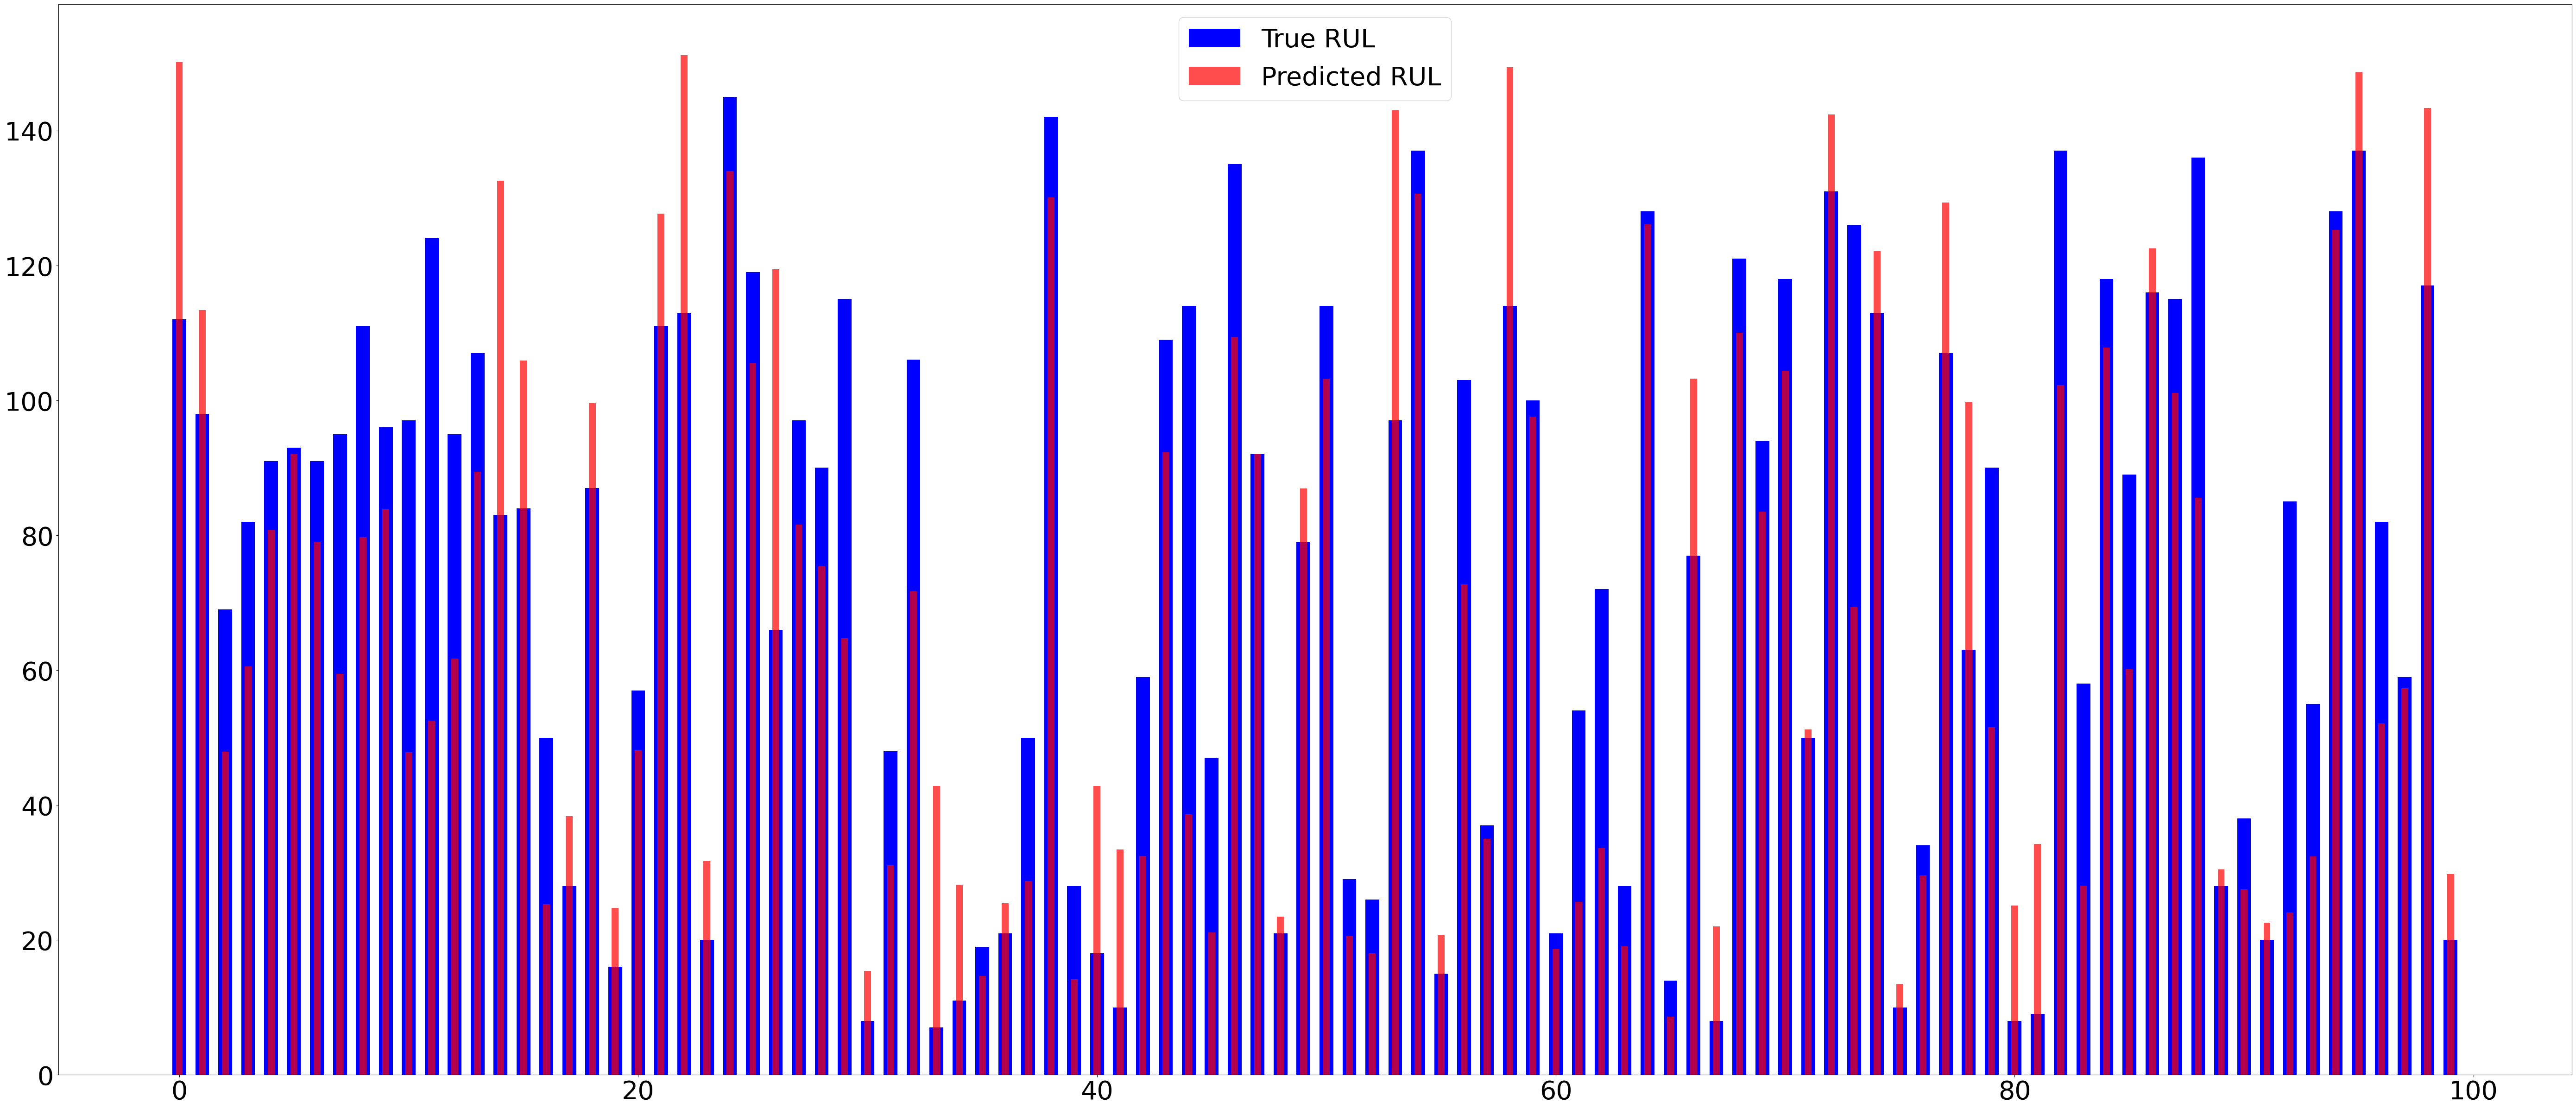

In [59]:
plot_predActual(y_valid, y_hat_valid)

# 3) Linear Regression


In [60]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_s,y_train)

# predict and evaluate
y_hat_train = model.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = model.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_valid = model.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:44.803728035551984, R2:0.5830135052284944
test set RMSE:46.11402576435105, R2:0.53573594329478
valid set RMSE:43.05877886885163, R2:-0.0736528326612873


In [61]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

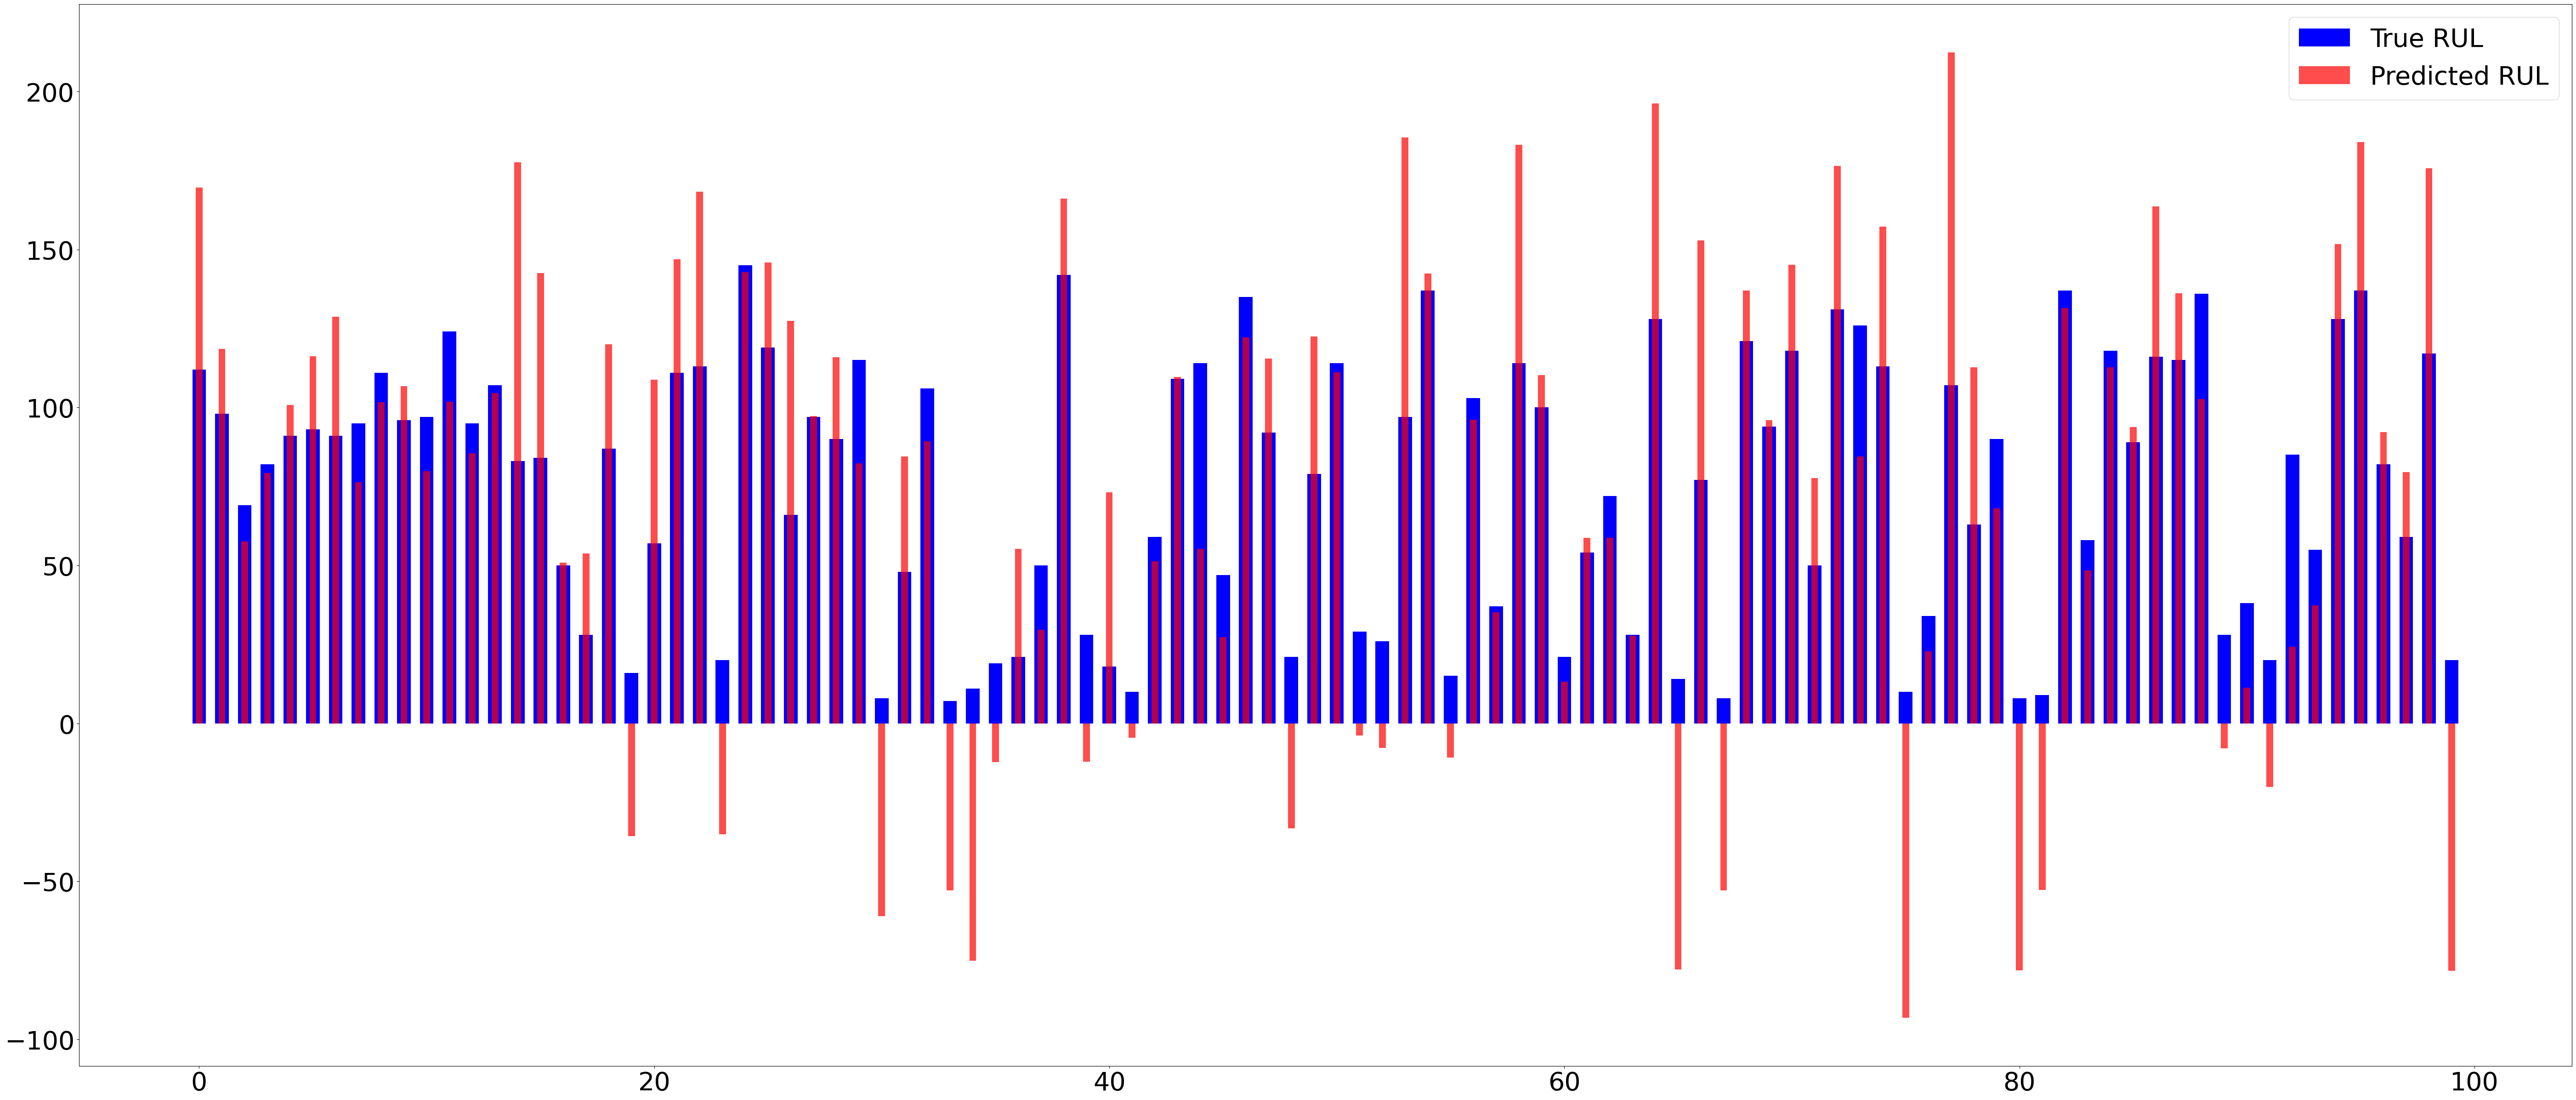

In [62]:
plot_predActual(y_valid, y_hat_valid)

# Feature importance

<BarContainer object of 14 artists>

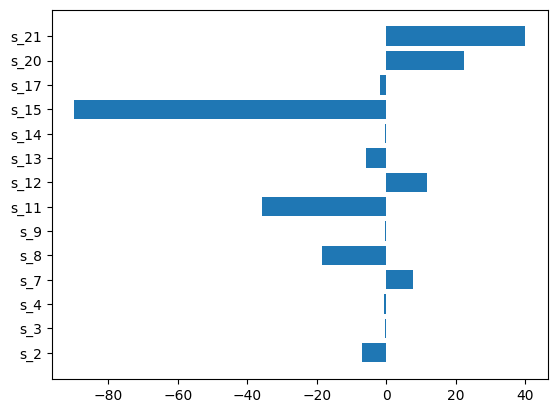

In [63]:
#BEST FEATURE FOR LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train, y=y_train)
plt.barh(X_train.columns, model.coef_)

<BarContainer object of 14 artists>

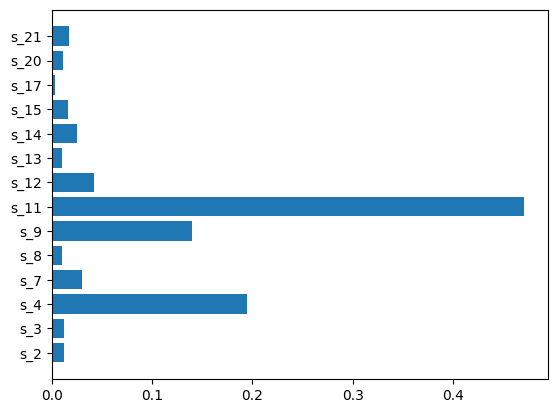

In [64]:
#BEST FEATURE FOR RANDOM FOREST i.e., RF MODEL
rf.fit(X_train, y_train)
plt.barh(X_train.columns, rf.feature_importances_)

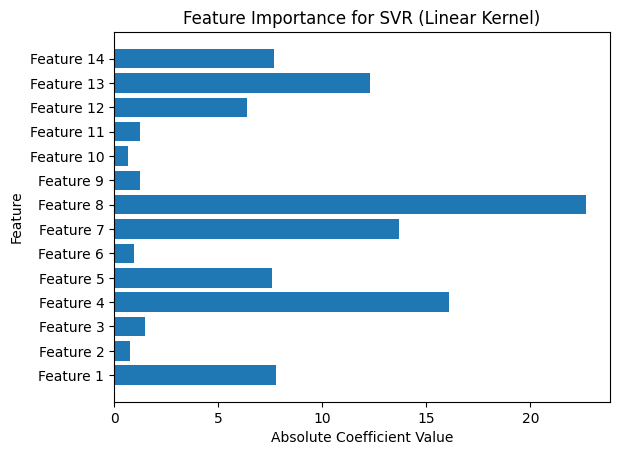

In [65]:
#BEST FEATURE FOR SUPPORT VECTOR REGRESSION (SVR)
from sklearn.svm import SVR

# Assuming X_train is your feature matrix and y_train is your target variable
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Get coefficients
coefficients = regressor.coef_[0]  # Extract the coefficients from the array

# Plot feature importance
plt.barh(range(X_train.shape[1]), np.abs(coefficients))
plt.yticks(range(X_train.shape[1]), [f'Feature {i}' for i in range(1, X_train.shape[1] + 1)])
plt.title('Feature Importance for SVR (Linear Kernel)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

Creating new df
i.e., removing common less important features(w.r.to all algorithms) in train, test and valid sets



In [66]:
X_train.drop(columns=['s_3','s_17'], inplace=True)
X_test.drop(columns=['s_3','s_17'], inplace=True)
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
X_valid.drop(columns=['s_3','s_17'], inplace=True)
X_valid_s=scaler.fit_transform(X_valid)

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=200,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_s, y_train)
# predict and evaluate
y_hat_train = rf.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:35.29518350643536, R2:0.7412236558168778
test set RMSE:44.226283822594795, R2:0.5729685279592203
valid set RMSE:35.11259711275048, R2:0.2860523597135919


What we are seeing here is that sensors s_9, s_11, s_12 et s_7 have a significant effect on RUL. For instance, if keep all other features constant, we notice that when the Physical core speed (represented by s_9) increases , the RUL is comparatively decreasing.



In [68]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

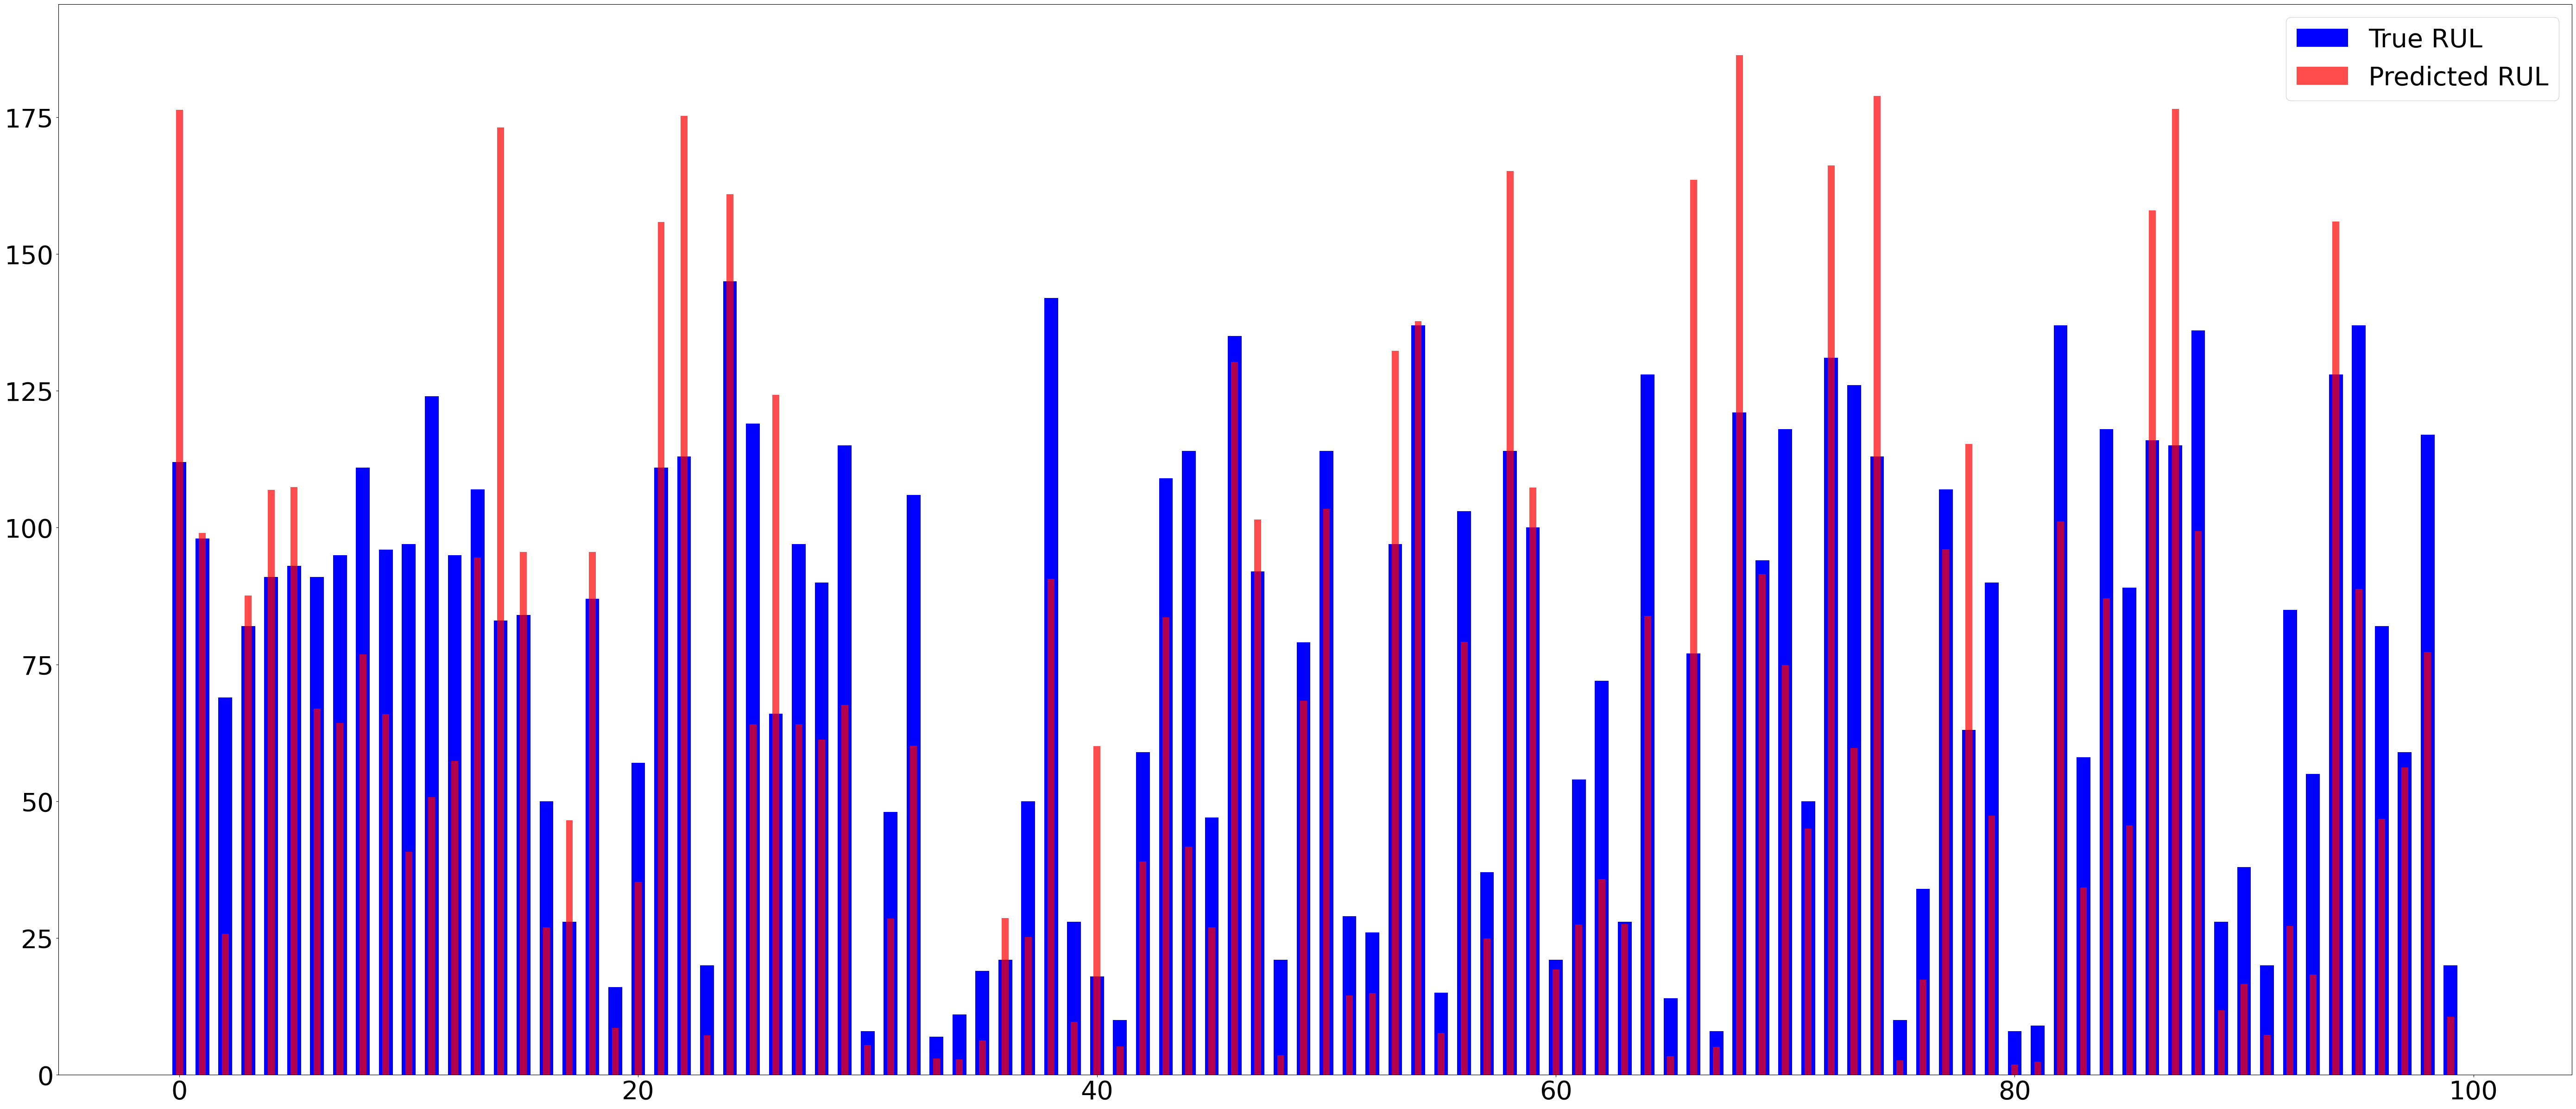

In [69]:
plot_predActual(y_valid, y_hat_valid)

Removing less important features

In [70]:
#### Creating new df for rf
Train_rf = X_train.copy()
Test_rf = X_test.copy()
Valid_rf = X_valid.copy()
Train_rf.drop(columns=['s_2','s_13','s_8','s_20'], inplace=True)
Test_rf.drop(columns=['s_2','s_13','s_8','s_20'], inplace=True)
Train_rf_s=scaler.fit_transform(Train_rf)
Test_rf_s=scaler.fit_transform(Test_rf)
Valid_rf.drop(columns=['s_2','s_13','s_8','s_20'], inplace=True)
Valid_rf_s=scaler.fit_transform(Valid_rf)

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=200,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(Train_rf_s, y_train)
# predict and evaluate
y_hat_train = rf.predict(Train_rf_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = rf.predict(Test_rf_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_valid = rf.predict(Valid_rf_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:35.938695300356585, R2:0.7317014670067755
test set RMSE:43.29195832822784, R2:0.590820893531979
valid set RMSE:35.34143520086585, R2:0.2767160635307957


Removing less contributing features for the random forest regressor and evaluating the model. Overfitting happens again

<BarContainer object of 22 artists>

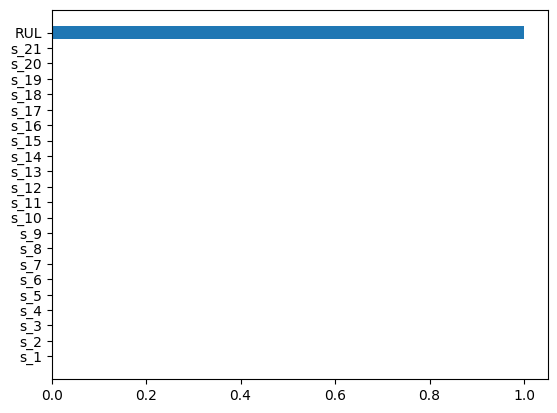

In [71]:
#BEST FEATURE FOR RF MODEL
rf.fit(Trainer, y_train)
plt.barh(Trainer.columns, rf.feature_importances_)

<BarContainer object of 22 artists>

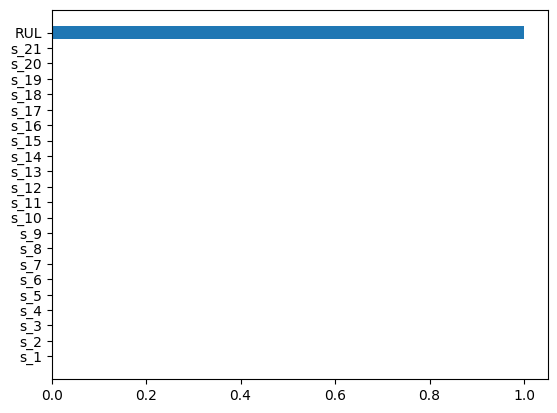

In [72]:
#BEST FEATURE FOR LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=Trainer, y=y_train)
plt.barh(Trainer.columns, model.coef_)

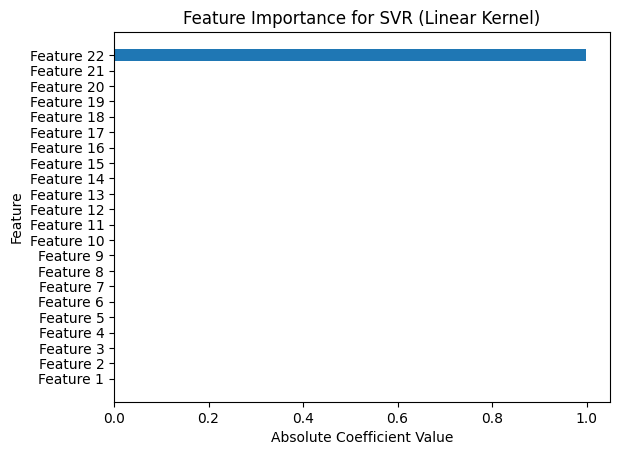

In [73]:
from sklearn.svm import SVR

# Assuming Trainer is your feature matrix and y_train is your target variable
regressor = SVR(kernel='linear')
regressor.fit(Trainer, y_train)

# Get coefficients
coefficients = regressor.coef_[0]  # Extract the coefficients from the array

# Plot feature importance
plt.barh(range(Trainer.shape[1]), np.abs(coefficients))
plt.yticks(range(Trainer.shape[1]), [f'Feature {i}' for i in range(1, Trainer.shape[1] + 1)])
plt.title('Feature Importance for SVR (Linear Kernel)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


<BarContainer object of 21 artists>

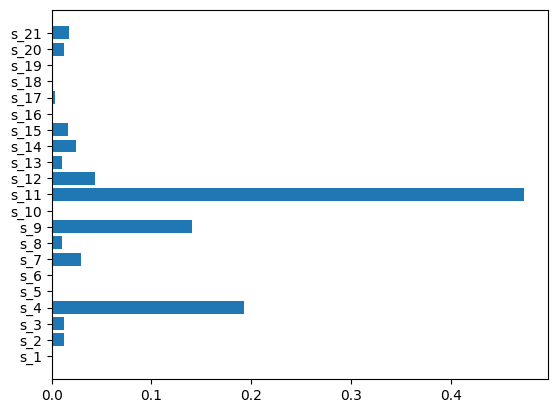

In [74]:
Trainer.drop(columns=['RUL'], inplace=True)
#BEST FEATURE FOR RF MODEL
rf.fit(Trainer, y_train)
plt.barh(Trainer.columns, rf.feature_importances_)

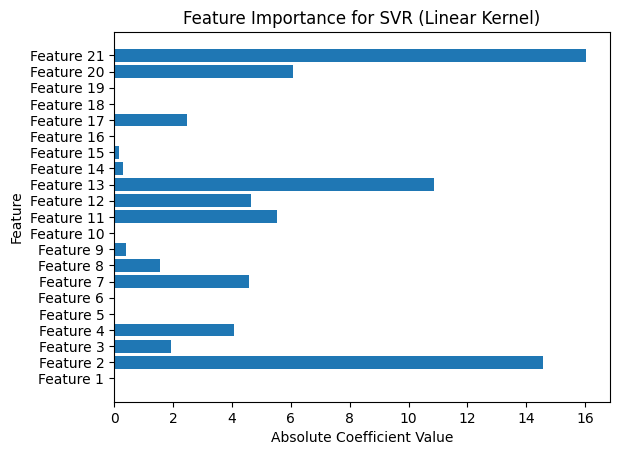

In [75]:
from sklearn.svm import SVR

# Assuming Trainer is your feature matrix and y_train is your target variable
regressor = SVR(kernel='linear')
regressor.fit(Trainer, y_train)

# Get coefficients
coefficients = regressor.coef_[0]  # Extract the coefficients from the array

# Plot feature importance
plt.barh(range(Trainer.shape[1]), np.abs(coefficients))
plt.yticks(range(Trainer.shape[1]), [f'Feature {i}' for i in range(1, Trainer.shape[1] + 1)])
plt.title('Feature Importance for SVR (Linear Kernel)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Best Model

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_s, y_train)
# predict and evaluate
y_hat_train = rf.predict(X_train_s)
evaluate(y_train,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_s)
evaluate(y_test, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:15.532135723357555, R2:0.9498863496611952
test set RMSE:44.317894428858324, R2:0.5711975842576446
valid set RMSE:32.28263096465342, R2:0.39649857638353225


Judging by the difference in RMSE and R2 scores, we notice that SVR & RF performs better than the other models when executed on the whole dataset. The valid test RMSE obtained is 26 in SVR and 32 in RF, which will be our score to beat while running the model on the best features found so far.
